# DAT 205 Project - Transform data
## By Dennis Hung
## Version 1
## Code DRAFT 2021-03-27

## Code Strucuture
### Section 0: Function definitions
### Section 1: Import libraries
### Section 2: Configuration of variables

### Section 3: Load the dataset from file and initial analysis
- #### Section 3.1: Load the dataset from file
- #### Section 3.2: Initial Analysis

### Section 4: Transforming/cleansing the data 
- #### Section 4.1: Enhance the data
- - #### Prepare data enhancement attributes in dataframe (df_TF) and create UID
- - #### Create new TeamGameStats dataframe to aggregate data by UID_STG
- ### Section 4.2:  NBA Advanced Stat - PIE (Player Impact Efficiency)
- ### Section 4.3:  NBA Advanced Stat - PER (Player Efficiency Rating)
- ### Section 4.4 Filter data by Team (if specified)
- ### Section 4.5: Remove (Stage 1) from dataframe the unwanted numerical/categorical features
- ### Section 4.6: Transform categorical feature (WL) using value replace
- ### Section 4.7: Transform categorical features using LabelEncoder
- ### Using OneHotEncoding (Not Working)
- ### Section 4.8: Define TARGET variable and separate into dataframes by season type

## Section 5: Analysis - Heat Maps / Correlation Matrices
- ### Section 5.1: Plot Heat Maps for Pre Season, Regular Season, and Playoffs
- ### Section 5.2: Remove additional unwanted fields based on Heat Map / Correlation Matrix
- ### Section 5.3: Re-check Heat Map / Correlation Matrix

## Section 6: Modeling and Analysis
- ### Section 6.1: Prepare train and test data
- ### Section 6.2: Apply Logistic Regression on the split train/test dataset
- ### Section 6.3: Apply Decision Tree Classifier on the split train/test dataset
- ### Section 6.4: Apply Random Forest Classifier on the split train/test dataset
- ### Section 6.5: Apply xgboost on the split train/test dataset
- ### (To be removed) Section 6.6: Apply SVM on the split train/test dataset

## (Issues) Section 7: Cross Validation Scores

## Section 8: Summary Report

## End of Code




# Updates

### 2021-03-xx

- Adding xgboost and SVM for modeling

- Tuning models



### 2021-03-27

Code fully working to handle 

- Loading of different files as raw from  "HistoricalGameLogs_*.csv' or after data enhancement "DAT205_Output_Enhanced_df_TF *.csv"

- Enable/disable data enhancment process

- Filtering by specific team or all the data before performing corelation matrix or model analysis





# Reference

#### How to Get NBA Data Using the nba_api Python Module (Beginner). Retrieved from Playing Numbers: 

https://www.playingnumbers.com/2019/12/how-to-get-nba-data-using-the-nba_api-python-module-beginner/

#### Patel, S. (2020, August 19). swar / nba_api. Retrieved from GitHub: 

https://github.com/swar/nba_api/blob/master/docs/table_of_contents.md

#### Issues

https://github.com/swar/nba_api/issues/124



# Note: 
#### For this analysis, this code relies on the CSV output from "DAT 205-Group01-NBA-HistPlayGameLogs.ipynb" or the enhanced data from this code as the dataset 

# Section 0: Function definitions

hms_string(sec_elapsed)


In [1]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60))/60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h,m,s)

# Null field analysis
def nullFieldAnalysis(df):
    df_missingDataInfo = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})
    #Printing the columns with over XX% of missing values (ie 60 = 60%) This is set to 0 for 0%
    null_threshold = 0 
    print("")
    print("")
    print("==== Null value analysis ====")
    return df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].sort_values(by=['Percent'])

# CalcThreshold_List
def CalcThreshold_List(totalRecords):
    CTL_10 = int(round(totalRecords*0.1,0))
    CTL_20 = int(round(totalRecords*0.2,0))
    CTL_30 = int(round(totalRecords*0.3,0))
    CTL_40 = int(round(totalRecords*0.4,0))
    CTL_50 = int(round(totalRecords*0.5,0))
    CTL_60 = int(round(totalRecords*0.6,0))
    CTL_70 = int(round(totalRecords*0.7,0))
    CTL_80 = int(round(totalRecords*0.8,0))
    CTL_90 = int(round(totalRecords*0.9,0))
    CTL_100 = int(round(totalRecords*1,0))

    CTL_05 = int(round(totalRecords*0.05,0))
    CTL_15 = int(round(totalRecords*0.15,0))
    CTL_25 = int(round(totalRecords*0.25,0))
    CTL_35 = int(round(totalRecords*0.35,0))
    CTL_45 = int(round(totalRecords*0.45,0))
    CTL_55 = int(round(totalRecords*0.55,0))
    CTL_65 = int(round(totalRecords*0.65,0))
    CTL_75 = int(round(totalRecords*0.75,0))
    CTL_85 = int(round(totalRecords*0.85,0))
    CTL_95 = int(round(totalRecords*0.95,0))

    Threshold_List = [1, CTL_05, CTL_10, CTL_15, CTL_20, CTL_25, CTL_30, CTL_35, CTL_40, CTL_45, 
                    CTL_50, CTL_55, CTL_60, CTL_65, CTL_70, CTL_75, CTL_80, CTL_85, 
                    CTL_90, CTL_95, CTL_100]
    return Threshold_List


# Section 1: Import libraries

In [2]:
# Install any missing libraries
# pip install xgboost
# pip install tpot

In [3]:
# Initialized required packages
# Standard packages
import numpy as np
import pandas as pd
import scipy as sp
import csv
import time

# Graphing packages
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import matplotlib.lines as mlines

# Data preparation
from sklearn.preprocessing import LabelEncoder

# Modeling packages
# import tensorflow as tf
# import sklearn as skl
from sklearn.model_selection import train_test_split

# Regression modeling
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# to fix xgboost warnings error
# https://github.com/EpistasisLab/tpot/issues/1139
# "Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior."
# from tpot import TPOTClassifier
# from tpot.config import classifier_config_dict

# from sklearn.ensemble import RandomForestRegressor


# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV
from sklearn.model_selection import GridSearchCV

# from sklearn.model_selection import cross_val_score

# Confusion matrix, Accuracy, sensitivity and specificity
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

# from sklearn.feature_selection import VarianceThreshold 
# from sklearn.feature_selection import RFE 
# from sklearn.feature_selection import RFECV

# Clustering
# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# Following code is being deprecated
# from sklearn.datasets.samples_generator import make_blobs

# Initialize variables if there is any debugging required
# Insert following line and activate the debugging.
# # VALIDATION CODE 
# if debug_active == 'yes':
# 
# Use "display(df)"" if the result command is "df" to retain the same format



start_time = time.time()

# Section 2: Configuration of variables

- Must manually set the following variables

- gameTypeListed as one of the following: 'Pre Season', 'Regular Season', 'Playoffs'



In [4]:

# General configuration
debug_active = 'yes'
loop_max = 100
# showNumRecs = 15
numFormat = '{:.4f}'
numFormat_Pct = "{:.0%}"

# Data Transformation 'yes' or other
# dataEnhancement_active = 'yes'
dataEnhancement_active = 'no'
    
# Section 3.1: Load the dataset from file
# pick who is running the code and comment out the others
# coder = 'bhavika'
# coder = 'cindy'
coder = 'dennis'

# Setup file name for csv or Excel (.xlsx)
if coder == 'bhavika':
    filename = 'D:/McMaster/DAT205/Capstone/Data/HistoricalGameLogs_2004-05_to_2019-20_ALL.csv'
elif coder == 'dennis':
    # filename = './HistoricalGameLogs_2004-05_to_2019-20_ALL.csv'
    filename = './DAT205_Output_Enhanced_df_TF 2004-2020.csv'
    # Test Data files
    # filename = './HistoricalGameLogs_2007-08_to_2008-09_ALL.csv'
    # filename = './DAT205_Output_Enhanced_df_TF 2007-09.csv'
    

# filename = filename + seasonStart + '_to_' + seasonEnd + '_' + gameType + '.csv'
# filename = filename + seasonStart + '_to_' + seasonEnd + '_ALL' + '.csv'


# Section 4.4 Filter data by Team (if specified)
# Filter the dataset by team or None
allTeamsList = ['CLE', 'LAC', 'NOH', 'WAS', 'ORL', 'NJN', 'PHX', 'DET', 'IND', \
       'CHA', 'DAL', 'ATL', 'NYK', 'CHI', 'BOS', 'MIN', 'PHI', 'HOU', \
       'POR', 'TOR', 'SAC', 'UTA', 'GSW', 'MIA', 'SEA', 'MEM', 'LAL', \
       'SAS', 'DEN', 'MIL', 'NOK', 'ZAK', 'CHN', 'PAN', 'RMA', 'MMT', \
       'MTA', 'MAL', 'LRO', 'EPT', 'OKC', 'LRY', 'BAR', 'MOS', 'OLP', \
       'PAR', 'LAB', 'MAC', 'MLN', 'BKN', 'FCB', 'RMD', 'MPS', 'EAM', \
       'ALB', 'FBU', 'NOP', 'UBB', 'FLA', 'BAU', 'FEN', 'SLA', 'SDS', \
       'BNE', 'MEL', 'SYD', 'GUA', 'PER', 'ADL', 'NZB', 'BJD', 'FRA']
# teamSelected = 'None'
teamSelected = 'TOR'

# Section 6: Modeling and Analysis
random_state_val = 42

# Section 6.1: Prepare train and test data
# Select a season 
gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
gameTypeListed_code = [0, 1, 2]
gameTypeToProcess = 1
test_size_val = 0.30

# Section 5: Analysis - Heat Maps / Correlation Matrices
plotSize = (20,15)




# # TEST CODE
# # Option 1: For all currently possible seasons
# # seasonsListed = ['1946-47', '1947-48', '1948-49', '1949-50'
# # , '1950-51', '1951-52', '1952-53', '1953-54', '1954-55', '1955-56', '1956-57', '1957-58', '1958-59', '1959-60'
# # , '1960-61', '1961-62', '1962-63', '1963-64', '1964-65', '1965-66', '1966-67', '1967-68', '1968-69', '1969-70'
# # , '1970-71', '1971-72', '1972-73', '1973-74', '1974-75', '1975-76', '1976-77', '1977-78', '1978-79', '1979-80'
# # , '1980-81', '1981-82', '1982-83', '1983-84', '1984-85', '1985-86', '1986-87', '1987-88', '1988-89', '1989-90'
# # , '1990-91', '1991-92', '1992-93', '1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99', '1999-00'
# # , '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10'
# # , '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20'
# # , '2020-21']

# seasonsListed = ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10'
# , '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

# seasonStart = seasonsListed[0]
# seasonEnd = seasonsListed[-1]

# # Request info for each season in the list
# df_gamelogs_player = []
# countFirstYear = 0

# Section 3: Load the dataset from file and initial analysis

## Section 3.1: Load the dataset from file

In [5]:
# load the CSV or Excel file 
# Note the other option in Jupyter Notebook is to use the upload the csv files before running the code

# lst of column names which needs to be string
lst_str_cols = ['GAME_ID']
# use dictionary comprehension to make dict of dtypes
dict_dtypes = {x : 'str'  for x in lst_str_cols}
# use dict on dtypes
df = pd.read_csv(filename, dtype=dict_dtypes)
# Excel file import
# df = pd.read_excel(filename)

# Remove duplicate index from import
if dataEnhancement_active == 'yes':
    unwanted_list = ['Unnamed: 0']
else: 
    unwanted_list = ['Unnamed: 0', 'UID_STG']

X_headers_list = df.columns.tolist()
for x in unwanted_list:
    X_headers_list.remove(x)

# Display current dataframe
df_Initial = df[X_headers_list]

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Initial)
    # Examine shape of dataframe
    display(df_Initial.shape)
    # Examine the type of attributes in the dataframe
    print("Shape of the dataset")
    df_Initial.info()
    # Describe the numerical data
    df_Initial.describe()
    


SEASON_YEAR  PLAYER_ID      PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
0          2004-05       2400      Drew Gooden  1610612739               CLE   
1          2004-05       2060      Marko Jaric  1610612746               LAC   
2          2004-05       2544     LeBron James  1610612739               CLE   
3          2004-05       2561       David West  1610612740               NOH   
4          2004-05       2413       Juan Dixon  1610612764               WAS   
...            ...        ...              ...         ...               ...   
465060     2019-20     204060       Joe Ingles  1610612762               UTA   
465061     2019-20    1626144  Emmanuel Mudiay  1610612762               UTA   
465062     2019-20     203924     Jerami Grant  1610612743               DEN   
465063     2019-20    1626196  Josh Richardson  1610612755               PHI   
465064     2019-20     202699    Tobias Harris  1610612755               PHI   

                   TEAM_NAME     GAME_ID            GAME_DATE      MATCHUP WL  \
0        Cleveland Cavaliers  0020401218  2005-04-20T00:00:00    CLE @ TOR  W   
1       Los Angeles Clippers  0020401225  2005-04-20T00:00:00    LAC @ NOH  W   
2        Cleveland Cavaliers  0020401218  2005-04-20T00:00:00    CLE @ TOR  W   
3        New Orleans Hornets  0020401225  2005-04-20T00:00:00  NOH vs. LAC  L   
4         Washington Wizards  0020401222  2005-04-20T00:00:00    WAS @ NYK  L   
...                      ...         ...                  ...          ... ..   
465060             Utah Jazz  0041900161  2020-08-17T00:00:00    UTA @ DEN  L   
465061             Utah Jazz  0041900161  2020-08-17T00:00:00    UTA @ DEN  L   
465062        Denver Nuggets  0041900161  2020-08-17T00:00:00  DEN vs. UTA  W   
465063    Philadelphia 76ers  0041900121  2020-08-17T00:00:00    PHI @ BOS  L   
465064    Philadelphia 76ers  0041900121  2020-08-17T00:00:00    PHI @ BOS  L   

        ...  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3       Game_Type  \
0       ...     0   3    0    6          12    0    0  Regular Season   
1       ...     0   1    0   14          11    0    0  Regular Season   
2       ...     1   1    0   27           9    1    1  Regular Season   
3       ...     1   5    0   11           7    0    0  Regular Season   
4       ...     0   2    0   13           0    0    0  Regular Season   
...     ...   ...  ..  ...  ...         ...  ...  ...             ...   
465060  ...     0   3    5   19         -14    0    0        Playoffs   
465061  ...     0   0    1    1           1    0    0        Playoffs   
465062  ...     0   2    6   19           1    0    0        Playoffs   
465063  ...     2   2    2   18         -10    0    0        Playoffs   
465064  ...     2   1    2   15          -2    0    0        Playoffs   

              PIE        PER  
0       10.526316  18.734402  
1       23.684211  19.951868  
2       39.181287  25.864125  
3       18.085106  23.408815  
4       13.698630  19.534590  
...           ...        ...  
465060  16.831683  15.724926  
465061  -1.485149  -1.273311  
465062  11.507937  19.245025  
465063  13.253012  10.035222  
465064  23.493976  19.449278  

[465065 rows x 37 columns]

(465065, 37)

Shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465065 entries, 0 to 465064
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEASON_YEAR        465065 non-null  object 
 1   PLAYER_ID          465065 non-null  int64  
 2   PLAYER_NAME        464325 non-null  object 
 3   TEAM_ID            465065 non-null  int64  
 4   TEAM_ABBREVIATION  465065 non-null  object 
 5   TEAM_NAME          465065 non-null  object 
 6   GAME_ID            465065 non-null  object 
 7   GAME_DATE          465065 non-null  object 
 8   MATCHUP            465065 non-null  object 
 9   WL                 465016 non-null  object 
 10  MIN                465065 non-null  float64
 11  FGM                465065 non-null  int64  
 12  FGA                465065 non-null  int64  
 13  FG_PCT             465065 non-null  float64
 14  FG3M               465065 non-null  int64  
 15  FG3A               465065 non-

## Section 3.2: Initial Analysis

In [6]:
# Display the headers of columns that use descriptive or non-numerical values
categorical_Features = df_Initial.dtypes[df_Initial.dtypes == "object"].index.tolist()

# VALIDATION CODE 
if debug_active == 'yes':
    print("VALIDATION CODE")
    print(categorical_Features)

# Describe the categorical data
print("")
print("")
print("==== Description of the categorical features ====")
display(df_Initial[categorical_Features].describe())

# # Null field analysis
nullFieldAnalysis(df_Initial)
# # Null field analysis
# df_missingDataInfo = pd.DataFrame({'Count': df_Initial.isnull().sum(), 'Percent': 100*df_Initial.isnull().sum()/len(df)})

# #Printing the columns with over XX% of missing values (ie 60 = 60%) This is set to 0 for 0%
# null_threshold = 0 
# print("")
# print("")
# print("==== Null value analysis ====")
# df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].sort_values(by=['Percent'])

VALIDATION CODE
['SEASON_YEAR', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'Game_Type']


==== Description of the categorical features ====


SEASON_YEAR   PLAYER_NAME TEAM_ABBREVIATION          TEAM_NAME  \
count       465065        464325            465065             465065   
unique          16          2389                72                 78   
top        2015-16  LeBron James               SAS  San Antonio Spurs   
freq         30809          1514             17937              17937   

           GAME_ID            GAME_DATE      MATCHUP      WL       Game_Type  
count       465065               465065       465065  465016          465065  
unique       22104                 3563         2392       2               3  
top     0010500120  2018-10-05T00:00:00  LAL vs. DEN       L  Regular Season  
freq            36                  339          604  232520          399371



==== Null value analysis ====


Count   Percent
WL              49  0.010536
PLAYER_NAME    740  0.159118

# 

# Section 4: Transforming/cleansing the data 

## Data cleansing of nulls (Not working)

## Correction to missing PreSeason games WL values only 

49 PreSeason records 

2007-08 
GAME_ID 0010700072 / 2007-10-19
BOS vs NJN   W 36 to L 33

2008-09 
GAME_ID 0010800035 / 2008-10-11
DEN vs PHX   W 77 to L 72
Note some player game data seems missing

## Corrected missing player name data

740 records (727 preseason and 13 regular season)

This is not important as the player names are excluded from the analysis



In [7]:
# # df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].loc[df_missingDataInfo[]]

# missingDataInfo_List = df_missingDataInfo.loc[df_missingDataInfo['Count']>0].index.tolist()
# # ['PLAYER_NAME', 'WL']

# numOfRows = len(df_missingDataInfo.index)

# for missingDataInfo_Value in missingDataInfo_List:
#     df_missingDataInfo[df_missingDataInfo[index] = missingDataInfo_Value]


# # Pull player data
# from nba_api.stats.static import players
# player_dict = players.get_players()


# # Use ternary operator or write function 
# # Names are case sensitive
# bron = [player for player in player_dict if player['full_name'] == 'LeBron James'][0]
# bron_id = bron['id']

# # find team Ids
# from nba_api.stats.static import teams 
# teams = teams.get_teams()
# GSW = [x for x in teams if x['full_name'] == 'Golden State Warriors'][0]
# GSW_id = GSW['id']

## Section 4.1: Enhance the data

In [8]:
# Setup variables for data transformation
df_TF = df_Initial
totalNumRec = df_TF.shape[0]

# Check df_TeamGameStats
# VALIDATION CODE 
if debug_active == 'yes':
    print(totalNumRec)
    display(df_TF)
    print(df_TF.columns)

465065


SEASON_YEAR  PLAYER_ID      PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
0          2004-05       2400      Drew Gooden  1610612739               CLE   
1          2004-05       2060      Marko Jaric  1610612746               LAC   
2          2004-05       2544     LeBron James  1610612739               CLE   
3          2004-05       2561       David West  1610612740               NOH   
4          2004-05       2413       Juan Dixon  1610612764               WAS   
...            ...        ...              ...         ...               ...   
465060     2019-20     204060       Joe Ingles  1610612762               UTA   
465061     2019-20    1626144  Emmanuel Mudiay  1610612762               UTA   
465062     2019-20     203924     Jerami Grant  1610612743               DEN   
465063     2019-20    1626196  Josh Richardson  1610612755               PHI   
465064     2019-20     202699    Tobias Harris  1610612755               PHI   

                   TEAM_NAME     GAME_ID            GAME_DATE      MATCHUP WL  \
0        Cleveland Cavaliers  0020401218  2005-04-20T00:00:00    CLE @ TOR  W   
1       Los Angeles Clippers  0020401225  2005-04-20T00:00:00    LAC @ NOH  W   
2        Cleveland Cavaliers  0020401218  2005-04-20T00:00:00    CLE @ TOR  W   
3        New Orleans Hornets  0020401225  2005-04-20T00:00:00  NOH vs. LAC  L   
4         Washington Wizards  0020401222  2005-04-20T00:00:00    WAS @ NYK  L   
...                      ...         ...                  ...          ... ..   
465060             Utah Jazz  0041900161  2020-08-17T00:00:00    UTA @ DEN  L   
465061             Utah Jazz  0041900161  2020-08-17T00:00:00    UTA @ DEN  L   
465062        Denver Nuggets  0041900161  2020-08-17T00:00:00  DEN vs. UTA  W   
465063    Philadelphia 76ers  0041900121  2020-08-17T00:00:00    PHI @ BOS  L   
465064    Philadelphia 76ers  0041900121  2020-08-17T00:00:00    PHI @ BOS  L   

        ...  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3       Game_Type  \
0       ...     0   3    0    6          12    0    0  Regular Season   
1       ...     0   1    0   14          11    0    0  Regular Season   
2       ...     1   1    0   27           9    1    1  Regular Season   
3       ...     1   5    0   11           7    0    0  Regular Season   
4       ...     0   2    0   13           0    0    0  Regular Season   
...     ...   ...  ..  ...  ...         ...  ...  ...             ...   
465060  ...     0   3    5   19         -14    0    0        Playoffs   
465061  ...     0   0    1    1           1    0    0        Playoffs   
465062  ...     0   2    6   19           1    0    0        Playoffs   
465063  ...     2   2    2   18         -10    0    0        Playoffs   
465064  ...     2   1    2   15          -2    0    0        Playoffs   

              PIE        PER  
0       10.526316  18.734402  
1       23.684211  19.951868  
2       39.181287  25.864125  
3       18.085106  23.408815  
4       13.698630  19.534590  
...           ...        ...  
465060  16.831683  15.724926  
465061  -1.485149  -1.273311  
465062  11.507937  19.245025  
465063  13.253012  10.035222  
465064  23.493976  19.449278  

[465065 rows x 37 columns]

Index(['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'Game_Type',
       'PIE', 'PER'],
      dtype='object')


### Prepare data enhancement attributes in dataframe (df_TF) and create UID 

In [9]:
if dataEnhancement_active == 'yes':
    # Add columns for
    #   UID_STG for SEASON_YEAR', 'TEAM_ID', 'GAME_ID'
    #   PIE for Performance Impact Efficiency
    #   PER for Player Efficieny Rating

    addFieldInTFList = ['UID_STG', 'PIE', 'PER']
    for addField in addFieldInTFList:
        df_TF[addField] = 'new field'

    # Reference to sum column values under certain condition.
    # https://intellipaat.com/community/49/how-do-i-sum-values-in-a-column-that-match-a-given-condition-using-pandas
    # https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/  
    # https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

    # # TEST CODE
    # df_TF['UID_STG'] = df_TF['UID_STG'].apply(lambda df_TF['UID_STG']: df_TF['SEASON_YEAR'] + str(df_TF['TEAM_ID'] +  df_TF['GAME_ID'])
    # df_TF['UID_STG'] = df_TF['UID_STG'].apply(lambda df_TF['UID_STG']: df_TF['SEASON_YEAR'])
    # df_TF['PIE'] = df_TF['PIE'].map(lambda df_TF['PIE']: df_TF['SEASON_YEAR'])

    Threshold_List = CalcThreshold_List(totalNumRec)
    start_time01 = time.time()
    print("==========================")
    print("Data enhancement")
    print("==========================")
    print("")
    print("Total Records ", totalNumRec)
    print("")
    print("% Completed | Duration (hh:mm:ss) | Record #")
    currNumRecord = 0

    for currNumRec in range(totalNumRec):
        df_TF['UID_STG'].loc[currNumRec] = df_TF['SEASON_YEAR'].loc[currNumRec] + str(df_TF['TEAM_ID'].loc[currNumRec]) +  df_TF['GAME_ID'].loc[currNumRec]
        
        currNumRecord = currNumRecord + 1
        if currNumRecord in Threshold_List:
            currPctCompleted = round((currNumRecord / totalNumRec) *100,1)
            time_took01 = time.time() - start_time01
            # % completed  |  Processing Time  |  Current Record 
            print("    ",currPctCompleted, "   |   ", hms_string(time_took01), "    |   ", currNumRecord)

    # Check df_TeamGameStats
    # VALIDATION CODE 
    if debug_active == 'yes':
        display(df_TF)

### Create new TeamGameStats dataframe to aggregate data by UID_STG

This is used by PIE

In [10]:
if dataEnhancement_active == 'yes':
    # Create dataframe of team game stats
    TeamGameStats_List = ['SEASON_YEAR','TEAM_ABBREVIATION', 'Game_Type', 'GmFGM', 'GmFGA', 'GmFG_PCT', 'GmFG3M', 'GmFG3A', 'GmFG3_PCT', 'GmFTM', 'GmFTA', 'GmFT_PCT', 'GmOREB', 'GmDREB', 'GmREB', 'GmAST', 'GmTOV', 'GmSTL', 'GmBLK', 'GmBLKA', 'GmPF', 'GmPFD', 'GmPTS', 'GmPLUS_MINUS', 'GmDD2', 'GmTD3', 'PIE_Bottom']

    # df_TeamGameStats = pd.DataFrame(data, index=index, columns=columns)
    df_TeamGameStats = pd.DataFrame(df_TF['UID_STG'].unique(), columns = ['UID_STG'])

    for TeamGameStat in TeamGameStats_List:
        df_TeamGameStats[TeamGameStat] = ''

# if dataEnhancement_active == 'yes':
    # Populate the dataframe with TeamGameStats for currNumRec in range(totalNumRec):
    totalNumRec_TGS = df_TeamGameStats.shape[0]

    TeamGameStat_List = df_TeamGameStats['UID_STG'].tolist()
    Threshold_List_TGS = CalcThreshold_List(totalNumRec_TGS)
    start_time02 = time.time()
    print("==========================")
    print("Data enhancement")
    print("==========================")
    print("")
    print("Total Records ", totalNumRec_TGS)
    print("")
    print("% Completed | Duration (hh:mm:ss) | Record #")
    currNumRecord = 0
    
    # for currTeamGameStat in TeamGameStat_List:  
    for currNumRec2 in range(totalNumRec_TGS):    
        # Pull UID_STG from df_TeamGameStats 
        currTeamGameUID = df_TeamGameStats['UID_STG'].loc[currNumRec2]
        # Filter df_TF by UID_STG and create temp dataframe for this data
        df_TF_Temp = []
        df_TF_Temp = df_TF[df_TF['UID_STG']==currTeamGameUID]
        # Input in to df_TeamGameStats row with the following calculations for 
        # 'SEASON_YEAR','TEAM_ABBREVIATION', 'Game_Type', 'GmFGM', 'GmFGA', 'GmFG_PCT', 'GmFG3M', 'GmFG3A', 'GmFG3_PCT', 
        # 'GmFTM', 'GmFTA', 'GmFT_PCT', 'GmOREB', 'GmDREB', 'GmREB', 'GmAST', 'GmTOV', 'GmSTL', 'GmBLK',
        # 'GmBLKA', 'GmPF', 'GmPFD', 'GmPTS', 'GmPLUS_MINUS', 'GmDD2', 'GmTD3'
        df_TeamGameStats['SEASON_YEAR'].loc[currNumRec2] = df_TF_Temp['SEASON_YEAR'].unique()[0]
        df_TeamGameStats['TEAM_ABBREVIATION'].loc[currNumRec2] = df_TF_Temp['TEAM_ABBREVIATION'].unique()[0]
        df_TeamGameStats['Game_Type'].loc[currNumRec2] = df_TF_Temp['Game_Type'].unique()[0]
        df_TeamGameStats['GmFGM'].loc[currNumRec2] = df_TF_Temp['FGM'].sum()
        df_TeamGameStats['GmFGA'].loc[currNumRec2] = df_TF_Temp['FGA'].sum()
        df_TeamGameStats['GmFG_PCT'].loc[currNumRec2] = df_TF_Temp['FGM'].sum() / df_TF_Temp['FGA'].sum()
        df_TeamGameStats['GmFG3M'].loc[currNumRec2] = df_TF_Temp['FG3M'].sum()
        df_TeamGameStats['GmFG3A'].loc[currNumRec2] = df_TF_Temp['FG3A'].sum()
        df_TeamGameStats['GmFG3_PCT'].loc[currNumRec2] = df_TF_Temp['FG3M'].sum() / df_TF_Temp['FG3A'].sum()
        df_TeamGameStats['GmFTM'].loc[currNumRec2] = df_TF_Temp['FTM'].sum()
        df_TeamGameStats['GmFTA'].loc[currNumRec2] = df_TF_Temp['FTA'].sum()
        df_TeamGameStats['GmFT_PCT'].loc[currNumRec2] = df_TF_Temp['FTM'].sum() / df_TF_Temp['FTA'].sum()
        df_TeamGameStats['GmOREB'].loc[currNumRec2] = df_TF_Temp['OREB'].sum()
        df_TeamGameStats['GmDREB'].loc[currNumRec2] = df_TF_Temp['DREB'].sum()
        df_TeamGameStats['GmREB'].loc[currNumRec2] = df_TF_Temp['OREB'].sum() + df_TF_Temp['DREB'].sum()
        df_TeamGameStats['GmAST'].loc[currNumRec2] = df_TF_Temp['AST'].sum()
        df_TeamGameStats['GmTOV'].loc[currNumRec2] = df_TF_Temp['TOV'].sum()
        df_TeamGameStats['GmSTL'].loc[currNumRec2] = df_TF_Temp['STL'].sum()
        df_TeamGameStats['GmBLK'].loc[currNumRec2] = df_TF_Temp['BLK'].sum()
        df_TeamGameStats['GmBLKA'].loc[currNumRec2] = df_TF_Temp['BLKA'].sum()
        df_TeamGameStats['GmPF'].loc[currNumRec2] = df_TF_Temp['PF'].sum()
        df_TeamGameStats['GmPFD'].loc[currNumRec2] = df_TF_Temp['PFD'].sum()
        df_TeamGameStats['GmPTS'].loc[currNumRec2] = df_TF_Temp['PTS'].sum()
        df_TeamGameStats['GmPLUS_MINUS'].loc[currNumRec2] = df_TF_Temp['PLUS_MINUS'].sum() / 5
        df_TeamGameStats['GmDD2'].loc[currNumRec2] = df_TF_Temp['DD2'].sum()
        df_TeamGameStats['GmTD3'].loc[currNumRec2] = df_TF_Temp['TD3'].sum()
        
        # PIE_Bottom 
        PIE_Bottom = (df_TeamGameStats['GmPTS'].loc[currNumRec2] + df_TeamGameStats['GmFGM'].loc[currNumRec2] + df_TeamGameStats['GmFTM'].loc[currNumRec2] \
        - df_TeamGameStats['GmFGA'].loc[currNumRec2] - df_TeamGameStats['GmFTA'].loc[currNumRec2] \
        + df_TeamGameStats['GmDREB'].loc[currNumRec2] + (0.5 * df_TeamGameStats['GmOREB'].loc[currNumRec2]) \
        + df_TeamGameStats['GmAST'].loc[currNumRec2] + df_TeamGameStats['GmSTL'].loc[currNumRec2] + (0.5 * df_TeamGameStats['GmBLK'].loc[currNumRec2]) \
        - df_TeamGameStats['GmPF'].loc[currNumRec2] - df_TeamGameStats['GmTOV'].loc[currNumRec2])
        # Insert calculated value into dataframe
        df_TeamGameStats['PIE_Bottom'].loc[currNumRec2] = PIE_Bottom
        # Counter to show this is still processing
        currNumRecord = currNumRecord + 1
        if currNumRecord in Threshold_List_TGS:
            currPctCompleted = round((currNumRecord / totalNumRec_TGS) *100,1)
            time_took02 = time.time() - start_time02
            # % completed  |  Processing Time  |  Current Record 
            print("    ",currPctCompleted, "   |   ", hms_string(time_took02), "    |   ", currNumRecord)

    # Check df_TeamGameStats
    # VALIDATION CODE 
    if debug_active == 'yes':
        display(df_TeamGameStats)

In [11]:
if dataEnhancement_active == 'yes':
    columnsToDropFrom_TGS = ['SEASON_YEAR','TEAM_ABBREVIATION', 'Game_Type', 'GmFGM', 'GmFGA', 'GmFG_PCT', 'GmFG3M' \
    , 'GmFG3A', 'GmFG3_PCT', 'GmFTM', 'GmFTA', 'GmFT_PCT', 'GmOREB', 'GmDREB', 'GmREB', 'GmAST', 'GmTOV', 'GmSTL' \
    , 'GmBLK', 'GmBLKA', 'GmPF', 'GmPFD', 'GmPTS', 'GmPLUS_MINUS', 'GmDD2', 'GmTD3']

    for dropColumn_TGS in columnsToDropFrom_TGS:
        del df_TeamGameStats[dropColumn_TGS]

    # Check df_TeamGameStats
    # VALIDATION CODE 
    if debug_active == 'yes':
        display(df_TeamGameStats)

## Section 4.2:  NBA Advanced Stats 

#### PIE (Player Impact Estimate)

Definition PIE measures a player's overall statistical contribution against the total statistics in games they play in. PIE yields results which are comparable to other advanced statistics (e.g. PER) using a simple formula.

Formula (PTS + FGM + FTM - FGA - FTA + DREB + (.5 * OREB) + AST + STL + (.5 * BLK) - PF - TO) / (GmPTS + GmFGM + GmFTM - GmFGA - GmFTA + GmDREB + (.5 * GmOREB) + GmAST + GmSTL + (.5 * GmBLK) - GmPF - GmTO)


#### PER (Player Efficiency Rating)

PER = (FGM x 85.910 + Steals * 53.897 + 3PTM * 51.757 + FTM x 46.845 + Blocks * 39.190 + Offensive_Reb * 39.190 + Assists * 34.677 + Defensive_Reb x 14.707 - Foul * 17.174 - FT_Miss x 20.091 - FG_Miss * 39.190 - TO * 53.897) * (1 / Minutes)
 

In [12]:
# TEST CODE

# currNumRec = 4
# PIE_Top = (df_TF['PTS'].loc[currNumRec] + df_TF['FGM'].loc[currNumRec] + df_TF['FTM'].loc[currNumRec] \
#         - df_TF['FGA'].loc[currNumRec] - df_TF['FTA'].loc[currNumRec] \
#         + df_TF['DREB'].loc[currNumRec] + (0.5 * df_TF['OREB'].loc[currNumRec]) \
#         + df_TF['AST'].loc[currNumRec] + df_TF['STL'].loc[currNumRec] + (0.5 * df_TF['BLK'].loc[currNumRec]) \
#         - df_TF['PF'].loc[currNumRec] - df_TF['TOV'].loc[currNumRec])

# Ref_UID_STG_Value = df_TF['UID_STG'].loc[currNumRec]   

# df_currTGSs = df_TeamGameStats[df_TeamGameStats['UID_STG']==Ref_UID_STG_Value]

# PIE_Bottom = df_currTGSs.iloc[0]['PIE_Bottom']
# # PIE_Bottom = (df_currTGSs['GmPTS'] + df_currTGSs['GmFGM'] + df_currTGSs['GmFTM'] \
# #         - df_currTGSs['GmFGA'] - df_currTGSs['GmFTA'] \
# #         + df_currTGSs['GmDREB'] + (0.5 * df_currTGSs['GmOREB']) \
# #         + df_currTGSs['GmAST'] + df_currTGSs['GmSTL'] + (0.5 * df_currTGSs['GmBLK']) \
# #         - df_currTGSs['GmPF'] - df_currTGSs['GmTOV'])
# PIE_Calc = PIE_Top / PIE_Bottom

# # df_TF['PIE'].loc[currNumRec] = PIE_Calc

# print("PIE_Top = ", PIE_Top)
# print(Ref_UID_STG_Value)
# display(df_currTGSs)

# print("PIE_Bottom = ", PIE_Bottom)
# print("PIE =", PIE_Calc)

In [13]:
if dataEnhancement_active == 'yes':
    Threshold_List = CalcThreshold_List(totalNumRec)
    start_time03 = time.time()
    print("==========================")
    print("Data enhancement")
    print("==========================")
    print("")
    print("Total Records ", totalNumRec)
    print("")
    print("% Completed | Duration (hh:mm:ss) | Record #")
    currNumRecord = 0
    
    for currNumRec in range(totalNumRec):
        # Calculates PIE
        # PTS + FGM + FTM - FGA - FTA + DREB + (.5 * OREB) + AST + STL + (.5 * BLK) - PF - TO) / (GmPTS + GmFGM + GmFTM - GmFGA - GmFTA + GmDREB + (.5 * GmOREB) + GmAST + GmSTL + (.5 * GmBLK) - GmPF - GmTO)

        PIE_Top = (df_TF['PTS'].loc[currNumRec] + df_TF['FGM'].loc[currNumRec] + df_TF['FTM'].loc[currNumRec] \
            - df_TF['FGA'].loc[currNumRec] - df_TF['FTA'].loc[currNumRec] \
            + df_TF['DREB'].loc[currNumRec] + (0.5 * df_TF['OREB'].loc[currNumRec]) \
            + df_TF['AST'].loc[currNumRec] + df_TF['STL'].loc[currNumRec] + (0.5 * df_TF['BLK'].loc[currNumRec]) \
            - df_TF['PF'].loc[currNumRec] - df_TF['TOV'].loc[currNumRec])
        # Get the UID_STG from the Player record df_TF
        Ref_UID_STG_Value = df_TF['UID_STG'].loc[currNumRec]   

        df_currTGSs = df_TeamGameStats[df_TeamGameStats['UID_STG']==Ref_UID_STG_Value]
        PIE_Bottom = df_currTGSs.iloc[0]['PIE_Bottom']
        PIE = PIE_Top / PIE_Bottom * 100
        df_TF['PIE'].loc[currNumRec] = PIE

        # # Calculates PER
        # # PER= (FGM * 85.910 + Steals * 53.897+ 3PTM * 51.757 + FTM * 46.845 + Blocks * 39.190 + Offensive_Reb * 39.190 + Assists * 34.677
        # #            + Defensive_Reb * 14.707 - Foul * 17.174 - FT_Miss * 20.091 - FG_Miss * 39.190- TO * 53.897) x (1 / Minutes)
        if df_TF['MIN'].loc[currNumRec] == 0:
            PER = 0
        else:
            FT_Miss = df_TF['FTA'].loc[currNumRec] - df_TF['FTM'].loc[currNumRec]
            FG_Miss = df_TF['FGA'].loc[currNumRec] - df_TF['FGM'].loc[currNumRec]
            
            PER = (df_TF['FGM'].loc[currNumRec] * 85.910 + df_TF['STL'].loc[currNumRec] * 53.897 \
            + df_TF['FG3M'].loc[currNumRec] * 51.757 + df_TF['FTM'].loc[currNumRec] * 46.845 \
            + df_TF['BLK'].loc[currNumRec] * 39.190 + df_TF['OREB'].loc[currNumRec] * 39.190 \
            + df_TF['AST'].loc[currNumRec] * 34.677 + df_TF['DREB'].loc[currNumRec] * 14.707 \
            - df_TF['PF'].loc[currNumRec] * 17.174 - FT_Miss * 20.091 - FG_Miss * 39.190 \
            - df_TF['TOV'].loc[currNumRec] * 53.897) / df_TF['MIN'].loc[currNumRec]

        df_TF['PER'].loc[currNumRec] = PER


        # Counter to show this is still processing
        currNumRecord = currNumRecord + 1
        if currNumRecord in Threshold_List:
            currPctCompleted = round((currNumRecord / totalNumRec) *100,1)
            time_took03 = time.time() - start_time03
            # % completed  |  Processing Time  |  Current Record 
            print("    ",currPctCompleted, "   |   ", hms_string(time_took03), "    |   ", currNumRecord)

## MERGED CODE Section 4.3:  NBA Advanced Stat - PER (Player Efficiency Rating)

In [14]:
# MERGED CODE FOR PER
# if dataEnhancement_active == 'yes':
#     Threshold_List = CalcThreshold_List(totalNumRec)
#     start_time04 = time.time()
#     print("==========================")
#     print("Data enhancement")
#     print("==========================")
#     print("")
#     print("Total Records ", totalNumRec)
#     print("")
#     print("% Completed | Duration (hh:mm:ss) | Record #")
#     currNumRecord = 0
#     start_time04 = time.time()
#     for currNumRec in range(totalNumRec):
#         # PER=[ FGM x 85.910 + Steals x 53.897+ 3PTM x 51.757 + FTM x 46.845 + Blocks x 39.190 + Offensive_Reb x 39.190 + Assists x 34.677
#         #            + Defensive_Reb x 14.707 - Foul x 17.174 - FT_Miss x 20.091 - FG_Miss x 39.190- TO x 53.897 ] x (1 / Minutes)
#         if df_TF['MIN'].loc[currNumRec] == 0:
#             PER = 0
#         else:
#             FT_Miss = df_TF['FTA'].loc[currNumRec] - df_TF['FTM'].loc[currNumRec]
#             FG_Miss = df_TF['FGA'].loc[currNumRec] - df_TF['FGM'].loc[currNumRec]
            
#             PER = (df_TF['FGM'].loc[currNumRec] * 85.910 + df_TF['STL'].loc[currNumRec] * 53.897 \
#             + df_TF['FG3M'].loc[currNumRec] * 51.757 + df_TF['FTM'].loc[currNumRec] * 46.845 \
#             + df_TF['BLK'].loc[currNumRec] * 39.190 + df_TF['OREB'].loc[currNumRec] * 39.190 \
#             + df_TF['AST'].loc[currNumRec] * 34.677 + df_TF['DREB'].loc[currNumRec] * 14.707 \
#             - df_TF['PF'].loc[currNumRec] * 17.174 - FT_Miss * 20.091 - FG_Miss * 39.190 \
#             - df_TF['TOV'].loc[currNumRec] * 53.897) / df_TF['MIN'].loc[currNumRec]

#         df_TF['PER'].loc[currNumRec] = PER

#          # Counter to show this is still processing
#         currNumRecord = currNumRecord + 1
#         if currNumRecord in Threshold_List:
#             currPctCompleted = round((currNumRecord / totalNumRec) *100,1)
#             time_took04 = time.time() - start_time04
#             # % completed  |  Processing Time  |  Current Record 
#             print("    ",currPctCompleted, "   |   ", hms_string(time_took04), "    |   ", currNumRecord)

In [15]:
# REMOVE NOTES FOR PER
# # Unadjusted Player Efficientcy Rating (uPER)
# uPER = (1 / MIN) *
#      [ FG3M
#      + (2/3) * AST
#      + (2 - factor * (team_AST / team_FG)) * FG
#      + (FT *0.5 * (1 + (1 - (team_AST / team_FG)) + (2/3) * (team_AST / team_FG)))
#      - VOP * TOV
#      - VOP * DRB% * (FGA - FG)
#      - VOP * 0.44 * (0.44 + (0.56 * DRB%)) * (FTA - FT)
#      + VOP * (1 - DRB%) * (TRB - ORB)
#      + VOP * DRB% * ORB
#      + VOP * STL
#      + VOP * DRB% * BLK
#      - PF * ((lg_FT / lg_PF) - 0.44 * (lg_FTA / lg_PF) * VOP) ]

# # Insert gameType column and list as one of the values in gameTypeListed
#         df_gamelogs_players_currSeason['Game_Type'] = gameType
#         if countFirstYear == 0:
#             df_gamelogs_players = df_gamelogs_players_currSeason
#             countFirstYear = 1
#         else:
#             # df_gamelogs_players = np.concatenate([df_gamelogs_players, df_gamelogs_players_currSeason])
#             df_gamelogs_players = pd.concat([df_gamelogs_players, df_gamelogs_players_currSeason],ignore_index=True)
#             # df_gamelogs_players = df_gamelogs_players.append(df_gamelogs_players_currSeason)


In [16]:
# Save enhanced data as CSV to avoid reprocessing
df_TF.to_csv('DAT205_Output_Enhanced_df_TF.csv') 

## Section 4.4 Filter data by Team (if specified)

In [17]:
# If a specific team is selected by 'TEAM_ABBREVIATION' then recreate the dataframe with this filter else use the entire dataset as is.
if teamSelected in allTeamsList:
    df_TF = df_TF[df_TF['TEAM_ABBREVIATION']==teamSelected]
else:
    df_TF    
display(df_TF)

SEASON_YEAR  PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
24         2004-05       2776        Pape Sow  1610612761               TOR   
65         2004-05       1425  Aaron Williams  1610612761               TOR   
106        2004-05       1747    Rafer Alston  1610612761               TOR   
125        2004-05       1960    Milt Palacio  1610612761               TOR   
131        2004-05       2241       Omar Cook  1610612761               TOR   
...            ...        ...             ...         ...               ...   
465020     2019-20     201586     Serge Ibaka  1610612761               TOR   
465022     2019-20    1628384      OG Anunoby  1610612761               TOR   
465035     2019-20    1629744     Matt Thomas  1610612761               TOR   
465047     2019-20    1627832   Fred VanVleet  1610612761               TOR   
465053     2019-20    1626181   Norman Powell  1610612761               TOR   

              TEAM_NAME     GAME_ID            GAME_DATE      MATCHUP WL  ...  \
24      Toronto Raptors  0020401218  2005-04-20T00:00:00  TOR vs. CLE  L  ...   
65      Toronto Raptors  0020401218  2005-04-20T00:00:00  TOR vs. CLE  L  ...   
106     Toronto Raptors  0020401218  2005-04-20T00:00:00  TOR vs. CLE  L  ...   
125     Toronto Raptors  0020401218  2005-04-20T00:00:00  TOR vs. CLE  L  ...   
131     Toronto Raptors  0020401218  2005-04-20T00:00:00  TOR vs. CLE  L  ...   
...                 ...         ...                  ...          ... ..  ...   
465020  Toronto Raptors  0041900111  2020-08-17T00:00:00  TOR vs. BKN  W  ...   
465022  Toronto Raptors  0041900111  2020-08-17T00:00:00  TOR vs. BKN  W  ...   
465035  Toronto Raptors  0041900111  2020-08-17T00:00:00  TOR vs. BKN  W  ...   
465047  Toronto Raptors  0041900111  2020-08-17T00:00:00  TOR vs. BKN  W  ...   
465053  Toronto Raptors  0041900111  2020-08-17T00:00:00  TOR vs. BKN  W  ...   

        BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3       Game_Type        PIE  \
24         1   5    0    6         -14    0    0  Regular Season   6.617647   
65         0   0    0    0          -4    0    0  Regular Season  -2.941176   
106        0   1    0    3         -17    0    0  Regular Season   0.000000   
125        0   2    0    2         -11    0    0  Regular Season   2.205882   
131        1   0    0   19           8    0    0  Regular Season  36.764706   
...      ...  ..  ...  ...         ...  ...  ...             ...        ...   
465020     0   2    2   22          17    0    0        Playoffs  16.858238   
465022     0   5    1   12          18    0    0        Playoffs   6.896552   
465035     0   1    0    0          11    0    0        Playoffs   1.532567   
465047     1   2    2   30          14    1    0        Playoffs  28.735632   
465053     1   3    0    6           3    0    0        Playoffs   1.532567   

              PER  
24      13.209262  
65     -15.268831  
106      2.179710  
125      8.788250  
131     33.296943  
...           ...  
465020  38.087609  
465022  15.651835  
465035  13.703261  
465047  42.700948  
465053   4.814073  

[15641 rows x 37 columns]

## Section 4.5: Remove (Stage 1) from dataframe the unwanted numerical/categorical features

#### Note: if data enhancement done then adjust 
unwanted_categorical_Features_TF

In [18]:
# Gather current list of features
numerical_Features = df_TF.columns.tolist()

# All possible features
# ['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'Game_Type']

for i in categorical_Features: 
    numerical_Features.remove(i)

# Lists unwanted features
unwanted_numerical_Features = ['PLAYER_ID', 'TEAM_ID']
unwanted_categorical_Features = ['PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP']

# # if Enchancement done then use this to get rid of what extras you don't want.
if dataEnhancement_active == 'yes':
    unwanted_categorical_Features_TF = ['UID_STG']

# unwanted_list_01 = unwanted_numerical_Features + unwanted_categorical_Features + unwanted_categorical_Features_TF
if dataEnhancement_active == 'yes':
    unwanted_list_01 = unwanted_numerical_Features + unwanted_categorical_Features + unwanted_categorical_Features_TF
else:
    unwanted_list_01 = unwanted_numerical_Features + unwanted_categorical_Features
X_headers_list = df_TF.columns.tolist()

for i in unwanted_list_01:
    X_headers_list.remove(i)

# Reset new dataframe with desired features
df_Reduced = df_TF[X_headers_list]

# Remaining attributes
# VALIDATION CODE 
if debug_active == 'yes':
    display(X_headers_list)

['SEASON_YEAR',
 'WL',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'DD2',
 'TD3',
 'Game_Type',
 'PIE',
 'PER']

## Section 4.6: Transform categorical feature (WL) using value replace

In [19]:
cleaned_categorical_Features = ['WL', 'Game_Type']
cleanupValue = {'WL': {'W': 1, 'L': 0}, 'Game_Type': {'Pre Season': 0, 'Regular Season': 1, 'Playoffs': 2}}
df_Reduced = df_Reduced.replace(cleanupValue)

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Reduced)

SEASON_YEAR  WL        MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  \
24         2004-05   0  22.133333    2    4   0.500     0     0    0.000    2   
65         2004-05   0   5.133333    0    2   0.000     0     0    0.000    0   
106        2004-05   0  17.250000    1    4   0.250     1     3    0.333    0   
125        2004-05   0  12.000000    1    1   1.000     0     0    0.000    0   
131        2004-05   0  30.750000    9   14   0.643     0     1    0.000    1   
...            ...  ..        ...  ...  ...     ...   ...   ...      ...  ...   
465020     2019-20   1  25.583333    8   14   0.571     2     4    0.500    4   
465022     2019-20   1  34.416667    4    8   0.500     3     5    0.600    1   
465035     2019-20   1   7.411667    0    1   0.000     0     1    0.000    0   
465047     2019-20   1  38.683333   11   15   0.733     8    10    0.800    0   
465053     2019-20   1  16.983333    2    4   0.500     2     3    0.667    0   

        ...  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  Game_Type        PIE  \
24      ...     1   5    0    6         -14    0    0          1   6.617647   
65      ...     0   0    0    0          -4    0    0          1  -2.941176   
106     ...     0   1    0    3         -17    0    0          1   0.000000   
125     ...     0   2    0    2         -11    0    0          1   2.205882   
131     ...     1   0    0   19           8    0    0          1  36.764706   
...     ...   ...  ..  ...  ...         ...  ...  ...        ...        ...   
465020  ...     0   2    2   22          17    0    0          2  16.858238   
465022  ...     0   5    1   12          18    0    0          2   6.896552   
465035  ...     0   1    0    0          11    0    0          2   1.532567   
465047  ...     1   2    2   30          14    1    0          2  28.735632   
465053  ...     1   3    0    6           3    0    0          2   1.532567   

              PER  
24      13.209262  
65     -15.268831  
106      2.179710  
125      8.788250  
131     33.296943  
...           ...  
465020  38.087609  
465022  15.651835  
465035  13.703261  
465047  42.700948  
465053   4.814073  

[15641 rows x 29 columns]

## Section 4.7: Transform categorical features using LabelEncoder

This will work with the reminding categorical values as there is a hierarchy for 

'SEASON_YEAR' - the more recent the season the more relevant it is where as older data is less valuable

'Game_Type' - need to think about this but assume regular season is more important

In [20]:
# # Select features to encode
e_categorical = categorical_Features

print(e_categorical)

for i in unwanted_categorical_Features:
    e_categorical.remove(i)

print(unwanted_categorical_Features)

for j in cleaned_categorical_Features:
    e_categorical.remove(j)

print(cleaned_categorical_Features)

print(e_categorical)

# Reset variable
categorical_Features = df_Reduced.dtypes[df_Reduced.dtypes == "object"].index.tolist()

lb_make = LabelEncoder()
# cat_list = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
# cat_list_code = ['Gender_code','Education_Level_code','Marital_Status_code','Income_Category_code','Card_Category_code']

df_Encoded = df_Reduced
# df_Encoded = df_Reduced[e_categorical]




['SEASON_YEAR', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'Game_Type']
['PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP']
['WL', 'Game_Type']
['SEASON_YEAR']


In [21]:
# Apply LabelEncoding on e_categorical features

for k in e_categorical:
    val_A = k
    val_B = k + '_code'
    df_Encoded[(val_B)] = lb_make.fit_transform(df_Encoded[val_A])

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Encoded) #Results in appending a new column to df

SEASON_YEAR  WL        MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  \
24         2004-05   0  22.133333    2    4   0.500     0     0    0.000    2   
65         2004-05   0   5.133333    0    2   0.000     0     0    0.000    0   
106        2004-05   0  17.250000    1    4   0.250     1     3    0.333    0   
125        2004-05   0  12.000000    1    1   1.000     0     0    0.000    0   
131        2004-05   0  30.750000    9   14   0.643     0     1    0.000    1   
...            ...  ..        ...  ...  ...     ...   ...   ...      ...  ...   
465020     2019-20   1  25.583333    8   14   0.571     2     4    0.500    4   
465022     2019-20   1  34.416667    4    8   0.500     3     5    0.600    1   
465035     2019-20   1   7.411667    0    1   0.000     0     1    0.000    0   
465047     2019-20   1  38.683333   11   15   0.733     8    10    0.800    0   
465053     2019-20   1  16.983333    2    4   0.500     2     3    0.667    0   

        ...  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  Game_Type        PIE  \
24      ...   5    0    6         -14    0    0          1   6.617647   
65      ...   0    0    0          -4    0    0          1  -2.941176   
106     ...   1    0    3         -17    0    0          1   0.000000   
125     ...   2    0    2         -11    0    0          1   2.205882   
131     ...   0    0   19           8    0    0          1  36.764706   
...     ...  ..  ...  ...         ...  ...  ...        ...        ...   
465020  ...   2    2   22          17    0    0          2  16.858238   
465022  ...   5    1   12          18    0    0          2   6.896552   
465035  ...   1    0    0          11    0    0          2   1.532567   
465047  ...   2    2   30          14    1    0          2  28.735632   
465053  ...   3    0    6           3    0    0          2   1.532567   

              PER  SEASON_YEAR_code  
24      13.209262                 0  
65     -15.268831                 0  
106      2.179710                 0  
125      8.788250                 0  
131     33.296943                 0  
...           ...               ...  
465020  38.087609                15  
465022  15.651835                15  
465035  13.703261                15  
465047  42.700948                15  
465053   4.814073                15  

[15641 rows x 30 columns]

## Using OneHotEncoding (Not Working)


In [22]:
# sel_cat_features = 'Sex'
# df_cat = pd.DataFrame(df[sel_cat_features])
# df_cat_dummies = pd.get_dummies(df_cat)

In [23]:
# sel_num_features.remove(sel_cat_features)
# df_sel_features = pd.concat([df[sel_num_features], df_cat_dummies], axis=1)
# df_sel_features

In [24]:
# print(categorical_Features)
# print(unwanted_categorical_Features)
# display(df_Encoded)
# display(df_Reduced[e_categorical])
# print(e_categorical)
# display(df_Reduced)


## Section 4.8: Define TARGET variable and separate into dataframes by season type

Remove (Stage 2) from dataframe the featuree (categorical, Target, and other unwanted)

Separating the dataframe by gameTypeListed ('Pre Season', 'Regular Season', 'Playoffs')

In [25]:
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Encoded)
    print(e_categorical)

SEASON_YEAR  WL        MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  \
24         2004-05   0  22.133333    2    4   0.500     0     0    0.000    2   
65         2004-05   0   5.133333    0    2   0.000     0     0    0.000    0   
106        2004-05   0  17.250000    1    4   0.250     1     3    0.333    0   
125        2004-05   0  12.000000    1    1   1.000     0     0    0.000    0   
131        2004-05   0  30.750000    9   14   0.643     0     1    0.000    1   
...            ...  ..        ...  ...  ...     ...   ...   ...      ...  ...   
465020     2019-20   1  25.583333    8   14   0.571     2     4    0.500    4   
465022     2019-20   1  34.416667    4    8   0.500     3     5    0.600    1   
465035     2019-20   1   7.411667    0    1   0.000     0     1    0.000    0   
465047     2019-20   1  38.683333   11   15   0.733     8    10    0.800    0   
465053     2019-20   1  16.983333    2    4   0.500     2     3    0.667    0   

        ...  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  Game_Type        PIE  \
24      ...   5    0    6         -14    0    0          1   6.617647   
65      ...   0    0    0          -4    0    0          1  -2.941176   
106     ...   1    0    3         -17    0    0          1   0.000000   
125     ...   2    0    2         -11    0    0          1   2.205882   
131     ...   0    0   19           8    0    0          1  36.764706   
...     ...  ..  ...  ...         ...  ...  ...        ...        ...   
465020  ...   2    2   22          17    0    0          2  16.858238   
465022  ...   5    1   12          18    0    0          2   6.896552   
465035  ...   1    0    0          11    0    0          2   1.532567   
465047  ...   2    2   30          14    1    0          2  28.735632   
465053  ...   3    0    6           3    0    0          2   1.532567   

              PER  SEASON_YEAR_code  
24      13.209262                 0  
65     -15.268831                 0  
106      2.179710                 0  
125      8.788250                 0  
131     33.296943                 0  
...           ...               ...  
465020  38.087609                15  
465022  15.651835                15  
465035  13.703261                15  
465047  42.700948                15  
465053   4.814073                15  

[15641 rows x 30 columns]

['SEASON_YEAR']


In [26]:
# Configure variables
# gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
# gameTypeListed_code = [0, 1, 2]
Y_headers_list1 = ['WL', 'Game_Type']
Y_headers_list2 = ['WL']
e_categorical = e_categorical + Y_headers_list2

# Define the current list of features
X_headers_list = df_Encoded.columns.tolist()

# Remove LabelEncoded categorical features
for k in e_categorical:
    X_headers_list.remove(k)

# VALIDATION CODE 
if debug_active == 'yes':
    print(e_categorical)

['SEASON_YEAR', 'WL']


In [27]:
df_X_Reduced2 = df_Encoded[X_headers_list]
df_Y_Reduced2 = df_Encoded[Y_headers_list1]
cleanDFColumns = ['Game_Type', 'SEASON_YEAR_code']
# cleanDFColumns = ['Game_Type']

for gameType in gameTypeListed_code:
    is_gameType_X = df_X_Reduced2['Game_Type']==gameType
    is_gameType_Y = df_Y_Reduced2['Game_Type']==gameType
    if gameType == 0:
        df_X_PreSeason = df_X_Reduced2[is_gameType_X]
        df_X_PreSeason = df_X_PreSeason.drop(cleanDFColumns, axis=1)
        df_Y_PreSeason = df_Y_Reduced2[is_gameType_Y]
        df_Y_PreSeason = df_Y_PreSeason[Y_headers_list2]
    elif gameType == 1:
        df_X_RegularSeason = df_X_Reduced2[is_gameType_X]
        df_X_RegularSeason = df_X_RegularSeason.drop(cleanDFColumns, axis=1)
        df_Y_RegularSeason = df_Y_Reduced2[is_gameType_Y]
        df_Y_RegularSeason = df_Y_RegularSeason[Y_headers_list2]
    elif gameType == 2:
        df_X_Playoffs = df_X_Reduced2[is_gameType_X]
        df_X_Playoffs = df_X_Playoffs.drop(cleanDFColumns, axis=1)
        df_Y_Playoffs = df_Y_Reduced2[is_gameType_Y]
        df_Y_Playoffs = df_Y_Playoffs[Y_headers_list2]


# VALIDATION CODE 
if debug_active == 'yes':
    print("")
    print("Pre Season")
    display(df_X_PreSeason)
    display(df_Y_PreSeason)
    print("")
    print("Regular Season")
    display(df_X_RegularSeason)
    display(df_Y_RegularSeason)
    print("")
    print("Playoffs")
    display(df_X_Playoffs)
    display(df_Y_Playoffs)


Pre Season


MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
26720   28.300000    8   14   0.571     4     4    1.000    2    5    0.40   
26724   23.166667    2    7   0.286     0     2    0.000    2    2    1.00   
26745   17.813333    2    4   0.500     1     1    1.000    0    0    0.00   
26757    5.353333    1    3   0.333     0     0    0.000    1    4    0.25   
26767   21.650000    6    7   0.857     0     0    0.000    1    2    0.50   
...           ...  ...  ...     ...   ...   ...      ...  ...  ...     ...   
440430  12.583333    2    4   0.500     0     1    0.000    3    4    0.75   
440445  26.850000    7   16   0.438     2     6    0.333    8    8    1.00   
440457  22.383333    8   10   0.800     1     1    1.000    1    2    0.50   
440464  17.966667    4    5   0.800     0     0    0.000    4    5    0.80   
440515   9.600000    3    4   0.750     2     3    0.667    1    1    1.00   

        ...  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3        PIE  \
26720   ...    0     1   2    0   22          17    0    0  22.413793   
26724   ...    0     0   3    0    6          14    0    0   4.597701   
26745   ...    0     0   3    0    5          12    0    0   5.747126   
26757   ...    0     0   1    0    3           2    0    0  -2.298851   
26767   ...    0     1   3    0   13           8    0    0   9.770115   
...     ...  ...   ...  ..  ...  ...         ...  ...  ...        ...   
440430  ...    0     0   3    2    7           3    0    0   5.645161   
440445  ...    1     1   4    7   24          -2    1    0  17.338710   
440457  ...    1     1   2    3   18         -10    0    0  12.096774   
440464  ...    1     0   3    5   12           6    0    0  12.500000   
440515  ...    0     0   0    1    9           9    0    0   6.451613   

              PER  
26720   34.526714  
26724    9.694964  
26745   12.750000  
26757    2.167808  
26767   20.854596  
...           ...  
440430  26.622278  
440445  30.960559  
440457  31.819345  
440464  37.885492  
440515  38.426979  

[1250 rows x 26 columns]

WL
26720    1
26724    1
26745    1
26757    1
26767    1
...     ..
440430   1
440445   1
440457   1
440464   1
440515   1

[1250 rows x 1 columns]


Regular Season


MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
24      22.133333    2    4   0.500     0     0    0.000    2    2   1.000   
65       5.133333    0    2   0.000     0     0    0.000    0    0   0.000   
106     17.250000    1    4   0.250     1     3    0.333    0    0   0.000   
125     12.000000    1    1   1.000     0     0    0.000    0    0   0.000   
131     30.750000    9   14   0.643     0     1    0.000    1    2   0.500   
...           ...  ...  ...     ...   ...   ...      ...  ...  ...     ...   
463346  25.993333    4   10   0.400     0     1    0.000    5    6   0.833   
463353  38.138333   11   26   0.423     2     5    0.400   10   11   0.909   
463359  44.335000   12   18   0.667     5     7    0.714    5    6   0.833   
463365  28.645000    2    7   0.286     1     5    0.200    0    0   0.000   
463366  44.998333    4   15   0.267     3    11    0.273   11   13   0.846   

        ...  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3        PIE  \
24      ...    1     1   5    0    6         -14    0    0   6.617647   
65      ...    0     0   0    0    0          -4    0    0  -2.941176   
106     ...    0     0   1    0    3         -17    0    0   0.000000   
125     ...    1     0   2    0    2         -11    0    0   2.205882   
131     ...    1     1   0    0   19           8    0    0  36.764706   
...     ...  ...   ...  ..  ...  ...         ...  ...  ...        ...   
463346  ...    0     0   2    3   13           6    0    0   5.797101   
463353  ...    1     4   6   10   34           5    1    0  27.536232   
463359  ...    0     1   0    5   34          18    0    0  37.681159   
463365  ...    0     0   2    0    5           2    0    0   5.314010   
463366  ...    0     1   4   11   22          -1    0    0  13.043478   

              PER  
24      13.209262  
65     -15.268831  
106      2.179710  
125      8.788250  
131     33.296943  
...           ...  
463346  11.656566  
463353  31.847223  
463359  35.749927  
463365   3.385512  
463366  14.945531  

[13372 rows x 26 columns]

WL
24       0
65       0
106      0
125      0
131      0
...     ..
463346   1
463353   1
463359   1
463365   1
463366   1

[13372 rows x 1 columns]


Playoffs


MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
83791    3.250000    1    2   0.500     1     2    0.500    0    0   0.000   
83792   40.000000    4    9   0.444     0     1    0.000    4    6   0.667   
83793   44.900000    4    5   0.800     0     0    0.000    1    2   0.500   
83794   12.000000    0    1   0.000     0     0    0.000    0    0   0.000   
83797   40.433333    6   11   0.545     2     2    1.000    3    4   0.750   
...           ...  ...  ...     ...   ...   ...      ...  ...  ...     ...   
465020  25.583333    8   14   0.571     2     4    0.500    4    4   1.000   
465022  34.416667    4    8   0.500     3     5    0.600    1    1   1.000   
465035   7.411667    0    1   0.000     0     1    0.000    0    0   0.000   
465047  38.683333   11   15   0.733     8    10    0.800    0    1   0.000   
465053  16.983333    2    4   0.500     2     3    0.667    0    0   0.000   

        ...  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3        PIE  \
83791   ...    0     0   0    0    3           2    0    0   1.219512   
83792   ...    0     0   5    3   12         -10    0    0   3.658537   
83793   ...    1     1   4    1    9           2    0    0  14.634146   
83794   ...    0     0   2    2    0           3    0    0  -1.829268   
83797   ...    1     1   3    2   17          -5    0    0  20.121951   
...     ...  ...   ...  ..  ...  ...         ...  ...  ...        ...   
465020  ...    1     0   2    2   22          17    0    0  16.858238   
465022  ...    2     0   5    1   12          18    0    0   6.896552   
465035  ...    0     0   1    0    0          11    0    0   1.532567   
465047  ...    1     1   2    2   30          14    1    0  28.735632   
465053  ...    0     1   3    0    6           3    0    0   1.532567   

              PER  
83791   13.716923  
83792    6.846475  
83793   11.085390  
83794   -1.636750  
83797   16.539868  
...           ...  
465020  38.087609  
465022  15.651835  
465035  13.703261  
465047  42.700948  
465053   4.814073  

[1019 rows x 26 columns]

WL
83791    0
83792    0
83793    0
83794    0
83797    0
...     ..
465020   1
465022   1
465035   1
465047   1
465053   1

[1019 rows x 1 columns]

# Section 5: Analysis - Heat Maps / Correlation Matrices

## Section 5.1: Plot Heat Maps for Pre Season, Regular Season, and Playoffs


Pre Season


<AxesSubplot:>

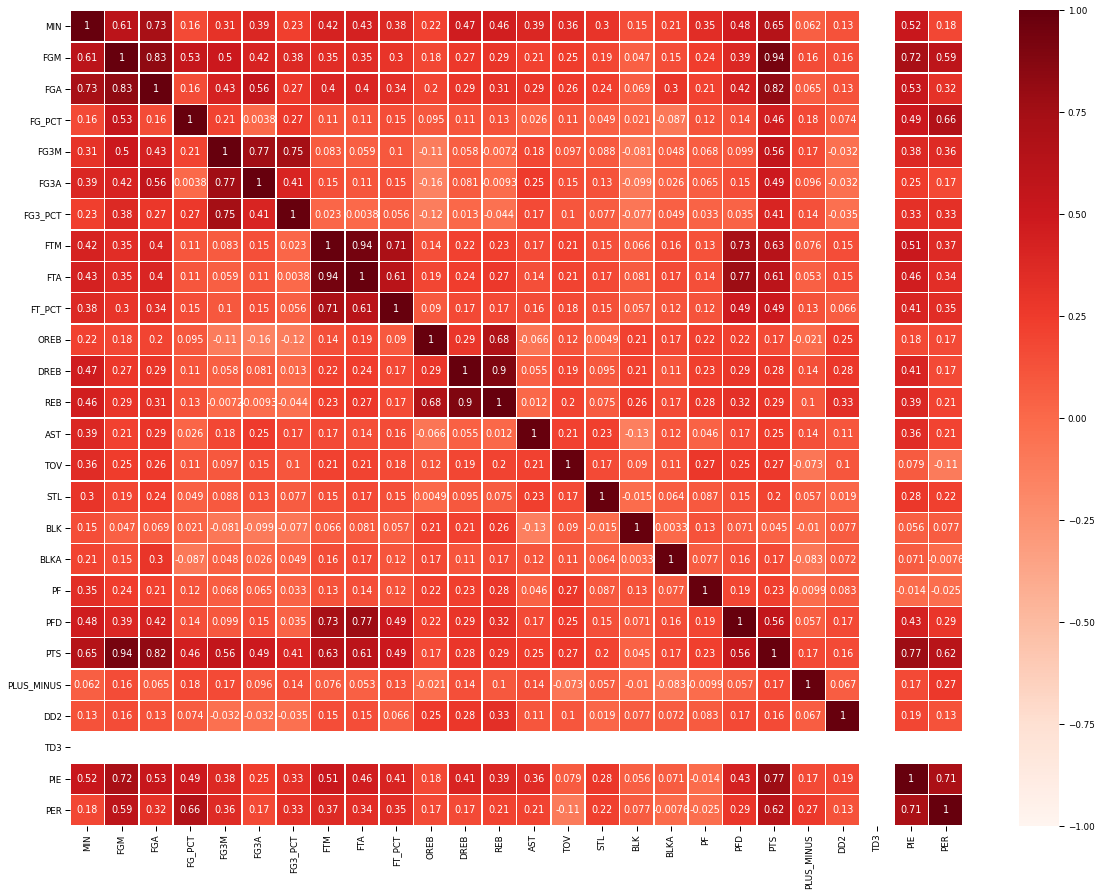

In [28]:
plotSize = (20,15)
# import seaborn as sns
plt.figure(figsize=plotSize)
sns.set_context("paper", font_scale=1)

# sns.heatmap(df.corr(), annot=True, cmap='Blues',vmin=-1, vmax=1, square=False, linewidths=0.5)
print("")
print("Pre Season")
sns.heatmap(df_X_PreSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_PreSeason)



Regular Season


<AxesSubplot:>

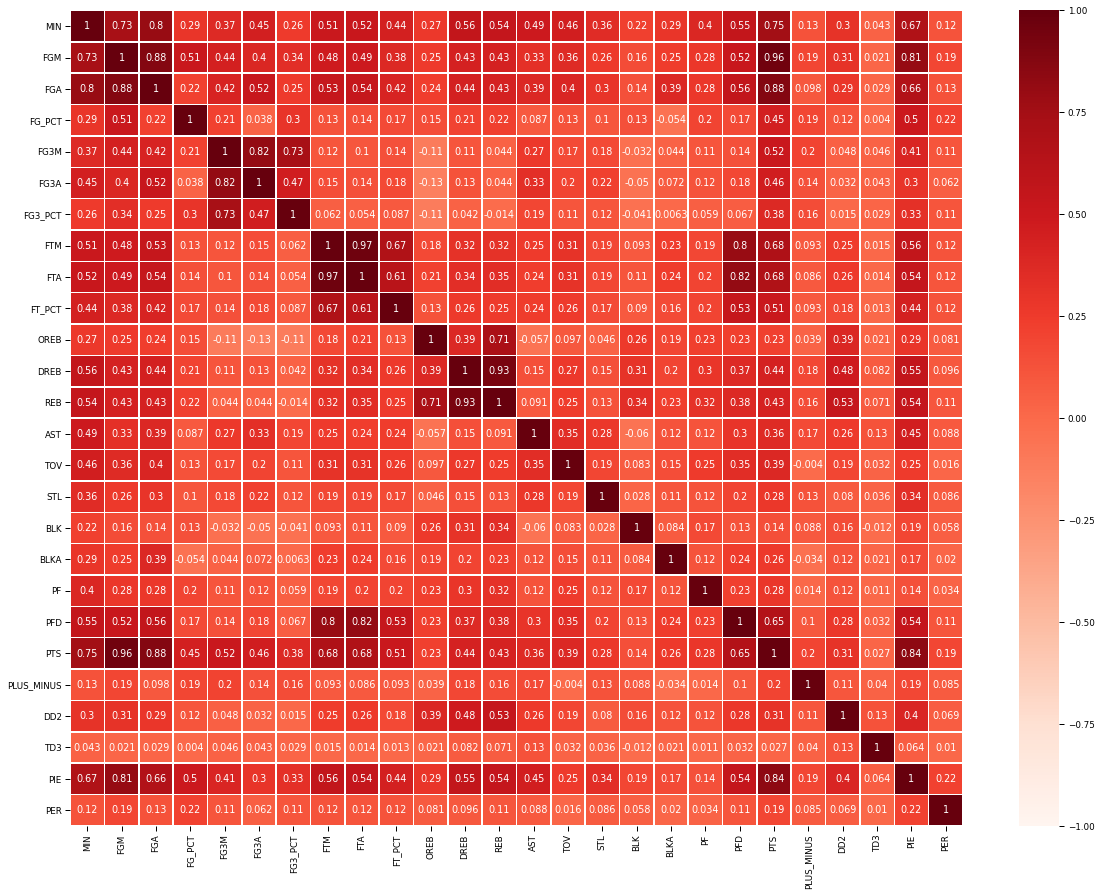

In [29]:
plt.figure(figsize=plotSize)
sns.set_context("paper", font_scale=1)
print("")
print("Regular Season")
sns.heatmap(df_X_RegularSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_RegularSeason)



Playoffs


<AxesSubplot:>

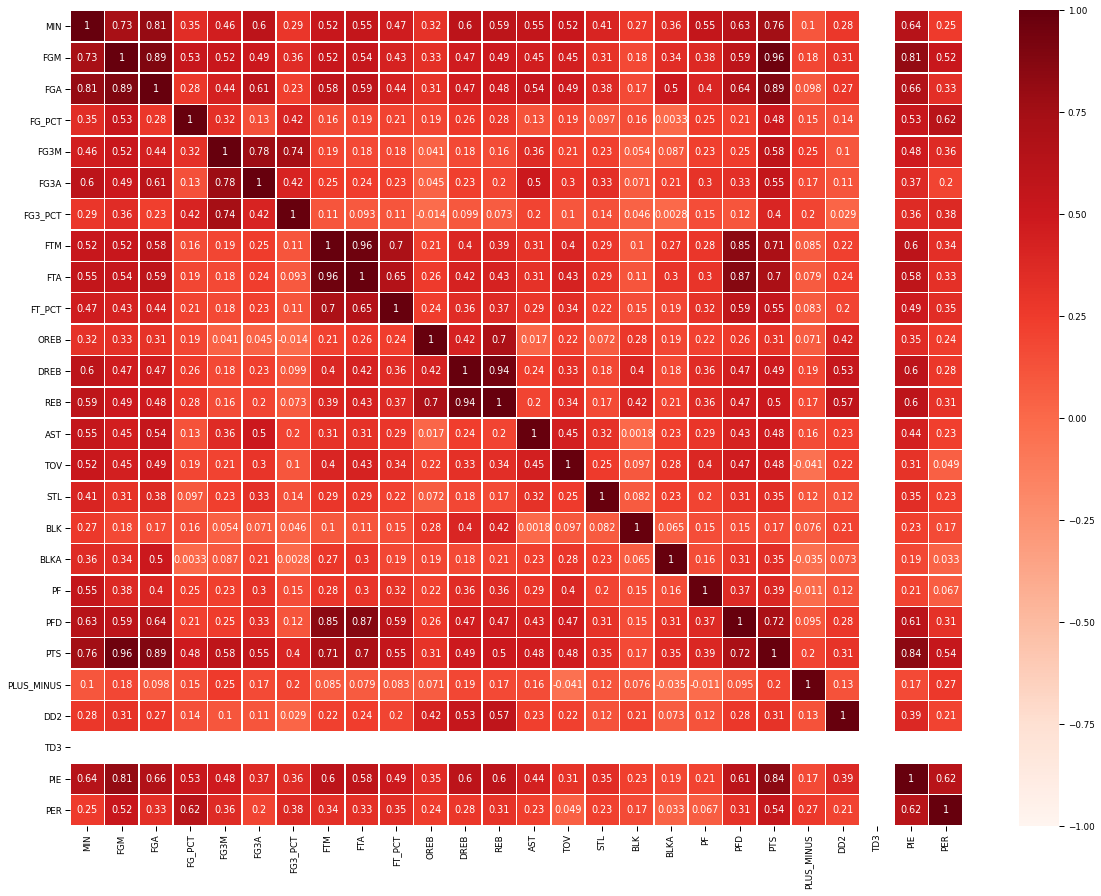

In [30]:
plt.figure(figsize=plotSize)
sns.set_context("paper", font_scale=1)
print("")
print("Playoffs")
sns.heatmap(df_X_Playoffs.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_Playoffs)

## Section 5.2: Remove additional unwanted fields based on Heat Map / Correlation Matrix

### Note: Adjust features to remove after analyzing the matrices

In [31]:
## Analysis of heat maps
### Removed anything over 0.8
#### PTS, FGA, FG3M, FTM, PFD, REB


### 2005-2020 TOR

### Preseason
#### FGM or PTS
#### FGA vs PTS
#### FGM or FGA
#### FTM vs FTA
#### PFD vs FTM FTA
#### REB vs DREB

### Reg Season
#### FGM vs PTS
#### FGA vs PTS
#### FGM vs FGA
#### FGA vs MIN
#### FG3A vs FG3M
#### FTM vs FTA
#### FTM vs PFD
#### FTA vs PFD
#### REB vs DREB


### Playoffs
#### FGM vs FGA
#### FGM vs PTS
#### FGA vs PTS
#### FGA vs MIN
#### FTA vs FTM
#### FTM vs PFD
#### FTA vs PFD
#### REB vs DREB


In [32]:
# Remove unwanted/useless features. anything over 80% was removed
# unwanted_list_02 = ['PTS', 'FGA', 'FG3M', 'FTM', 'PFD', 'REB']
unwanted_list_02 = ['PTS', 'FGA', 'FG3M', 'FTM', 'PFD', 'REB']

for gameType in gameTypeListed_code:
    if gameType == 0:
        df_X_PreSeason = df_X_PreSeason.drop(unwanted_list_02, axis=1)
    elif gameType == 1:
        df_X_RegularSeason = df_X_RegularSeason.drop(unwanted_list_02, axis=1)
    elif gameType == 2:
        df_X_Playoffs = df_X_Playoffs.drop(unwanted_list_02, axis=1)


# Remaining features and after removal of unwanted features in the dataframes
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_X_PreSeason)
    display(df_X_RegularSeason)
    display(df_X_Playoffs)    

MIN  FGM  FG_PCT  FG3A  FG3_PCT  FTA  FT_PCT  OREB  DREB  AST  \
26720   28.300000    8   0.571     4    1.000    5    0.40     3     4    1   
26724   23.166667    2   0.286     2    0.000    2    1.00     0     2    2   
26745   17.813333    2   0.500     1    1.000    0    0.00     0     2    3   
26757    5.353333    1   0.333     0    0.000    4    0.25     0     0    1   
26767   21.650000    6   0.857     0    0.000    2    0.50     1     1    0   
...           ...  ...     ...   ...      ...  ...     ...   ...   ...  ...   
440430  12.583333    2   0.500     1    0.000    4    0.75     2     3    3   
440445  26.850000    7   0.438     6    0.333    8    1.00     2     9    4   
440457  22.383333    8   0.800     1    1.000    2    0.50     3     2    1   
440464  17.966667    4   0.800     0    0.000    5    0.80     2     5    2   
440515   9.600000    3   0.750     3    0.667    1    1.00     0     0    0   

        TOV  STL  BLK  BLKA  PF  PLUS_MINUS  DD2  TD3        PIE        PER  
26720     0    2    0     1   2          17    0    0  22.413793  34.526714  
26724     0    2    0     0   3          14    0    0   4.597701   9.694964  
26745     1    1    0     0   3          12    0    0   5.747126  12.750000  
26757     0    0    0     0   1           2    0    0  -2.298851   2.167808  
26767     1    0    0     1   3           8    0    0   9.770115  20.854596  
...     ...  ...  ...   ...  ..         ...  ...  ...        ...        ...  
440430    3    2    0     0   3           3    0    0   5.645161  26.622278  
440445    5    1    1     1   4          -2    1    0  17.338710  30.960559  
440457    3    0    1     1   2         -10    0    0  12.096774  31.819345  
440464    0    0    1     0   3           6    0    0  12.500000  37.885492  
440515    0    0    0     0   0           9    0    0   6.451613  38.426979  

[1250 rows x 20 columns]

MIN  FGM  FG_PCT  FG3A  FG3_PCT  FTA  FT_PCT  OREB  DREB  AST  \
24      22.133333    2   0.500     0    0.000    2   1.000     0     3    0   
65       5.133333    0   0.000     0    0.000    0   0.000     0     0    0   
106     17.250000    1   0.250     3    0.333    0   0.000     0     0    1   
125     12.000000    1   1.000     0    0.000    0   0.000     0     1    0   
131     30.750000    9   0.643     1    0.000    2   0.500     1     2    9   
...           ...  ...     ...   ...      ...  ...     ...   ...   ...  ...   
463346  25.993333    4   0.400     1    0.000    6   0.833     2     3    0   
463353  38.138333   11   0.423     5    0.400   11   0.909     6    12    5   
463359  44.335000   12   0.667     7    0.714    6   0.833     0     5    7   
463365  28.645000    2   0.286     5    0.200    0   0.000     1     7    2   
463366  44.998333    4   0.267    11    0.273   13   0.846     1     4    6   

        TOV  STL  BLK  BLKA  PF  PLUS_MINUS  DD2  TD3        PIE        PER  
24        0    2    1     1   5         -14    0    0   6.617647  13.209262  
65        0    0    0     0   0          -4    0    0  -2.941176 -15.268831  
106       0    0    0     0   1         -17    0    0   0.000000   2.179710  
125       0    0    1     0   2         -11    0    0   2.205882   8.788250  
131       2    2    1     1   0           8    0    0  36.764706  33.296943  
...     ...  ...  ...   ...  ..         ...  ...  ...        ...        ...  
463346    3    1    0     0   2           6    0    0   5.797101  11.656566  
463353    4    0    1     4   6           5    1    0  27.536232  31.847223  
463359    2    2    0     1   0          18    0    0  37.681159  35.749927  
463365    2    0    0     0   2           2    0    0   5.314010   3.385512  
463366    4    2    0     1   4          -1    0    0  13.043478  14.945531  

[13372 rows x 20 columns]

MIN  FGM  FG_PCT  FG3A  FG3_PCT  FTA  FT_PCT  OREB  DREB  AST  \
83791    3.250000    1   0.500     2    0.500    0   0.000     0     0    0   
83792   40.000000    4   0.444     1    0.000    6   0.667     0     1    3   
83793   44.900000    4   0.800     0    0.000    2   0.500     1     7    0   
83794   12.000000    0   0.000     0    0.000    0   0.000     1     1    0   
83797   40.433333    6   0.545     2    1.000    4   0.750     0     7    1   
...           ...  ...     ...   ...      ...  ...     ...   ...   ...  ...   
465020  25.583333    8   0.571     4    0.500    4   1.000     3     4    3   
465022  34.416667    4   0.500     5    0.600    1   1.000     2     3    1   
465035   7.411667    0   0.000     1    0.000    0   0.000     0     0    3   
465047  38.683333   11   0.733    10    0.800    1   0.000     0     2   11   
465053  16.983333    2   0.500     3    0.667    0   0.000     0     3    0   

        TOV  STL  BLK  BLKA  PF  PLUS_MINUS  DD2  TD3        PIE        PER  
83791     2    1    0     0   0           2    0    0   1.219512  13.716923  
83792     2    1    0     0   5         -10    0    0   3.658537   6.846475  
83793     1    2    1     1   4           2    0    0  14.634146  11.085390  
83794     0    0    0     0   2           3    0    0  -1.829268  -1.636750  
83797     1    1    1     1   3          -5    0    0  20.121951  16.539868  
...     ...  ...  ...   ...  ..         ...  ...  ...        ...        ...  
465020    1    0    1     0   2          17    0    0  16.858238  38.087609  
465022    1    1    2     0   5          18    0    0   6.896552  15.651835  
465035    0    1    0     0   1          11    0    0   1.532567  13.703261  
465047    1    2    1     1   2          14    1    0  28.735632  42.700948  
465053    2    0    0     1   3           3    0    0   1.532567   4.814073  

[1019 rows x 20 columns]

## Section 5.3: Re-check Heat Map / Correlation Matrix

This is only a check but not necessary.


Pre Season


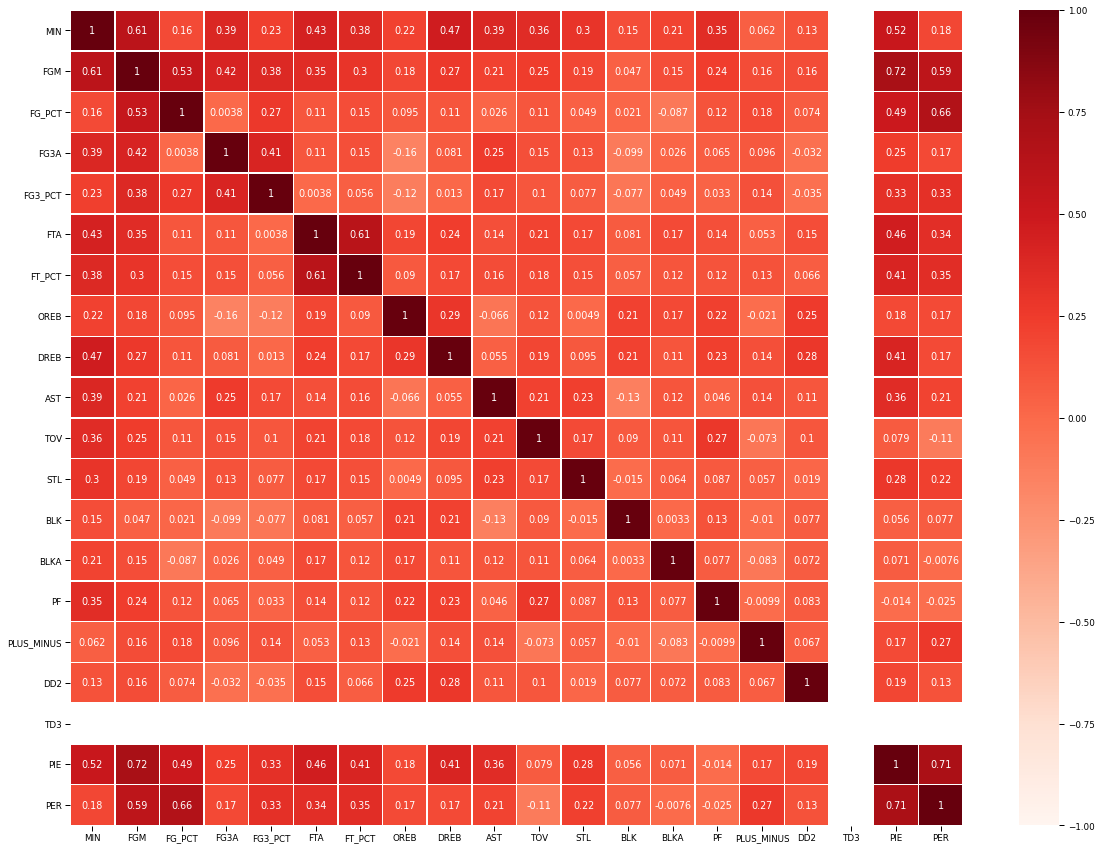

In [33]:
# VALIDATION CODE 
if debug_active == 'yes':
    plt.figure(figsize=plotSize)
    sns.set_context("paper", font_scale=1)
    print("")
    print("Pre Season")
    sns.heatmap(df_X_PreSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
    # display(df_X_PreSeason)



Regular Season


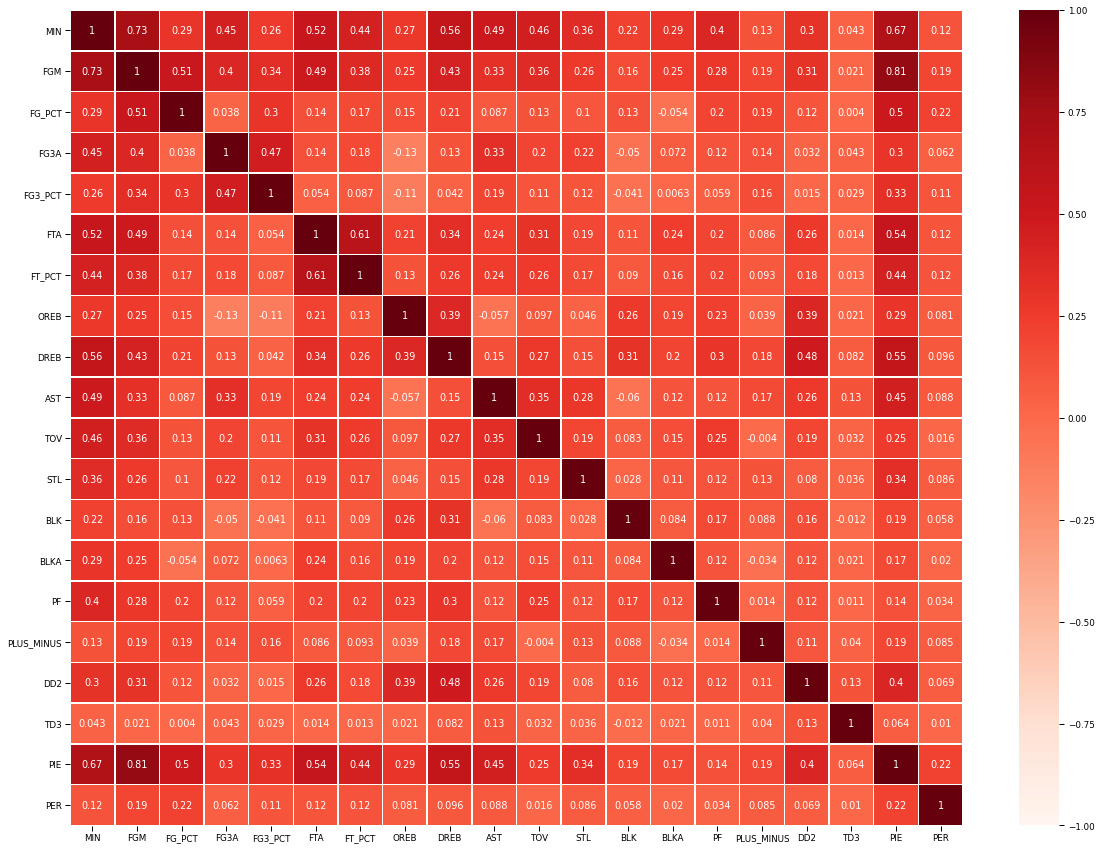

In [34]:
# VALIDATION CODE 
if debug_active == 'yes':
    plt.figure(figsize=plotSize)
    sns.set_context("paper", font_scale=1)
    print("")
    print("Regular Season")
    sns.heatmap(df_X_RegularSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
    # display(df_X_RegularSeason)


Playoffs


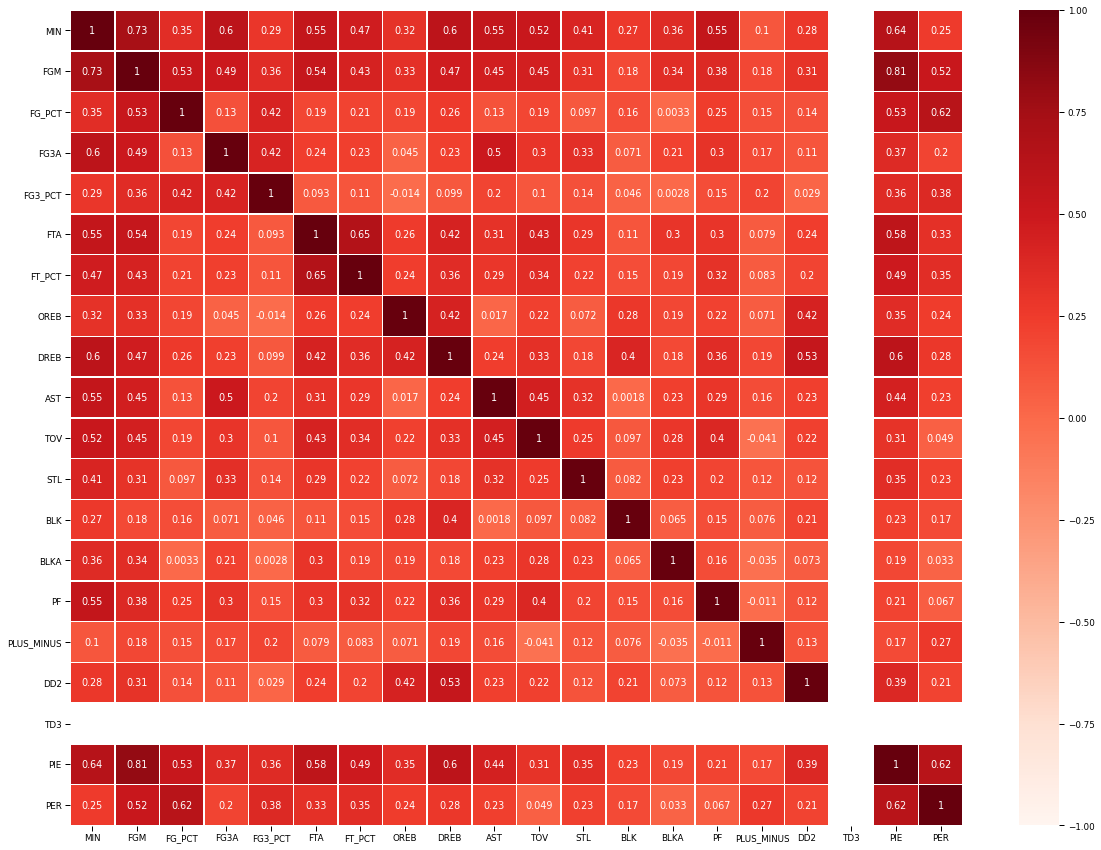

In [35]:
# VALIDATION CODE 
if debug_active == 'yes':
    plt.figure(figsize=plotSize)
    sns.set_context("paper", font_scale=1)
    print("")
    print("Playoffs")
    sns.heatmap(df_X_Playoffs.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
    # display(df_X_Playoffs)

# Section 6: Modeling and Analysis

## Section 6.1: Prepare train and test data

In [36]:
# Select a season 
# gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
# gameTypeListed_code = [0, 1, 2]

if gameTypeToProcess == 0:
    X = df_X_PreSeason
    Y = df_Y_PreSeason
elif gameTypeToProcess == 1:
    X = df_X_RegularSeason
    Y = df_Y_RegularSeason
elif gameTypeToProcess == 2:
    X = df_X_Playoffs
    Y = df_Y_Playoffs

# Split the code into training and test dataset 0.7/0.3
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_size_val, random_state = random_state_val)

selectedSeasonRecordCount = X_train.shape[0] + X_test.shape[0]

# VALIDATION CODE 
if debug_active == 'yes':
    # Validate the split at a high level
    print(X_train.shape,Y_train.shape)
    print(X_test.shape,Y_test.shape)
    print('Season Type: ', gameTypeToProcess)
    df_Encoded.to_csv('DAT205_Output_All.csv') 
    X_train.to_csv('DAT205_Output_Split_X_train.csv') 
    X_test.to_csv('DAT205_Output_Split_X_test.csv') 
    Y_train.to_csv('DAT205_Output_Split_Y_train.csv') 
    Y_test.to_csv('DAT205_Output_Split_Y_test.csv') 
    display(X_train)
    display(Y_train)


(9360, 20) (9360, 1)
(4012, 20) (4012, 1)
Season Type:  1


MIN  FGM  FG_PCT  FG3A  FG3_PCT  FTA  FT_PCT  OREB  DREB  AST  \
283719  12.200000    2   0.667     1     1.00    2     0.5     0     2    0   
162591  20.683333    5   0.625     0     0.00    0     0.0     1     2    1   
97913   20.483333    6   0.600     2     0.50    0     0.0     0     1    2   
339662  24.683333    3   0.429     4     0.25    1     1.0     0     3    1   
276744  20.600000    4   0.800     2     1.00    2     1.0     1     2    0   
...           ...  ...     ...   ...      ...  ...     ...   ...   ...  ...   
417149  16.750000    4   0.444     5     0.40    0     0.0     0     2    0   
179266  12.520000    1   0.200     0     0.00    0     0.0     3     1    0   
185931   7.666667    2   0.667     0     0.00    2     0.5     3     1    0   
30039   16.900000    2   0.500     0     0.00    0     0.0     2     4    0   
250357  34.891667    8   0.727     0     0.00    0     0.0     2     8    2   

        TOV  STL  BLK  BLKA  PF  PLUS_MINUS  DD2  TD3        PIE        PER  
283719    1    2    0     1   2           1    0    0   8.695652  21.320000  
162591    1    0    0     0   2           7    0    0   8.152174  15.810604  
97913     0    4    0     0   2          -2    0    0  10.980392  32.990627  
339662    1    1    0     0   3          -1    0    0   5.714286   9.190331  
276744    1    0    2     0   2          11    0    0  11.500000  27.203544  
...     ...  ...  ...   ...  ..         ...  ...  ...        ...        ...  
417149    0    0    0     1   1           7    0    0   7.058824  15.728000  
179266    0    0    0     2   2         -16    0    0  -1.562500   2.162859  
185931    0    0    0     1   0          11    0    0  11.000000  38.042739  
30039     2    0    1     0   4          -7    0    0   2.459016   5.523550  
250357    1    0    1     1   6           8    1    0  24.137931  20.559322  

[9360 rows x 20 columns]

WL
283719   1
162591   1
97913    1
339662   1
276744   1
...     ..
417149   0
179266   1
185931   0
30039    0
250357   0

[9360 rows x 1 columns]

In [37]:
# VALIDATION CODE 
if debug_active == 'yes':
    display(X)
    display(Y)

MIN  FGM  FG_PCT  FG3A  FG3_PCT  FTA  FT_PCT  OREB  DREB  AST  \
24      22.133333    2   0.500     0    0.000    2   1.000     0     3    0   
65       5.133333    0   0.000     0    0.000    0   0.000     0     0    0   
106     17.250000    1   0.250     3    0.333    0   0.000     0     0    1   
125     12.000000    1   1.000     0    0.000    0   0.000     0     1    0   
131     30.750000    9   0.643     1    0.000    2   0.500     1     2    9   
...           ...  ...     ...   ...      ...  ...     ...   ...   ...  ...   
463346  25.993333    4   0.400     1    0.000    6   0.833     2     3    0   
463353  38.138333   11   0.423     5    0.400   11   0.909     6    12    5   
463359  44.335000   12   0.667     7    0.714    6   0.833     0     5    7   
463365  28.645000    2   0.286     5    0.200    0   0.000     1     7    2   
463366  44.998333    4   0.267    11    0.273   13   0.846     1     4    6   

        TOV  STL  BLK  BLKA  PF  PLUS_MINUS  DD2  TD3        PIE        PER  
24        0    2    1     1   5         -14    0    0   6.617647  13.209262  
65        0    0    0     0   0          -4    0    0  -2.941176 -15.268831  
106       0    0    0     0   1         -17    0    0   0.000000   2.179710  
125       0    0    1     0   2         -11    0    0   2.205882   8.788250  
131       2    2    1     1   0           8    0    0  36.764706  33.296943  
...     ...  ...  ...   ...  ..         ...  ...  ...        ...        ...  
463346    3    1    0     0   2           6    0    0   5.797101  11.656566  
463353    4    0    1     4   6           5    1    0  27.536232  31.847223  
463359    2    2    0     1   0          18    0    0  37.681159  35.749927  
463365    2    0    0     0   2           2    0    0   5.314010   3.385512  
463366    4    2    0     1   4          -1    0    0  13.043478  14.945531  

[13372 rows x 20 columns]

WL
24       0
65       0
106      0
125      0
131      0
...     ..
463346   1
463353   1
463359   1
463365   1
463366   1

[13372 rows x 1 columns]

## Section 6.2: Apply Logistic Regression on the split train/test dataset

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression

LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)



In [38]:
# np.isnan(df_Encoded.any())
# np.isfinite(df_Encoded.all())

# np.any(np.isnan(df_Encoded))
# np.all(np.isfinite(df_Encoded))

### Logistic Regression - Base Model

In [39]:
# Create the model
LogRegM = LogisticRegression(C=1, solver='liblinear', random_state = random_state_val)

# Train the model
LogRegM.fit(X_train, Y_train.values.ravel())

# Predict using test data
Y_pred = LogRegM.predict(X_test)

df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_Y_pred.to_csv('DAT205_Output_Y_pred_LogRegM.csv') 

# Y_pred = pd.DataFrame(Y_pred, columns = ["WL_code"])
# df = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])
# VALIDATION CODE 
if debug_active == 'yes':
    display(Y_pred)
    display(df_Y_pred)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

Y_pred
0          1
1          1
2          1
3          0
4          0
...      ...
4007       1
4008       1
4009       1
4010       0
4011       1

[4012 rows x 1 columns]

## Confusion Matrix Analysis Notes
https://www.google.com/search?q=confusion+matrix&rlz=1C1GCEA_enCA849CA849&oq=confusion+&aqs=chrome.1.69i57j0i433l2j0j0i433j0l5.2966j0j7&sourceid=chrome&ie=UTF-8

## Analysis score notes 
https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

### Compute your model’s analysis

In [40]:
accuracy_score_LogRegM = accuracy_score(Y_test, Y_pred)
f1_score_LogRegM = f1_score(Y_test, Y_pred)
recall_score_LogRegM = recall_score(Y_test, Y_pred)
precision_score_LogRegM = precision_score(Y_test, Y_pred)
classification_report_LogRegM = classification_report(Y_test, Y_pred)
confusion_matrix_LogRegM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_LogRegM
sensitivity_LogRegM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_LogRegM = cm[1,1]/(cm[1,0]+cm[1,1])


# VALIDATION CODE 
if debug_active == 'yes':
    print('Model Parameteres =', LogRegM.get_params())
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_LogRegM))
    print('F1 score:', numFormat.format(f1_score_LogRegM))
    print('Recall:', numFormat.format(recall_score_LogRegM))
    print('Precision:', numFormat.format(precision_score_LogRegM))
    print('Sensitivity : ', numFormat.format(sensitivity_LogRegM))
    print('Specificity : ', numFormat.format(specificity_LogRegM))
    print('\n clasification report:\n', classification_report_LogRegM)
    print('\n confussion matrix:\n',confusion_matrix_LogRegM)

Model Parameteres = {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Accuracy: 0.7213
F1 score: 0.7362
Recall: 0.7666
Precision: 0.7081
Sensitivity :  0.6748
Specificity :  0.7666

 clasification report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70      1977
           1       0.71      0.77      0.74      2035

    accuracy                           0.72      4012
   macro avg       0.72      0.72      0.72      4012
weighted avg       0.72      0.72      0.72      4012


 confussion matrix:
 [[1334  643]
 [ 475 1560]]


In [41]:
# Feature Importance
importance = LogRegM.coef_[0]
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_LogRegM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_LogRegM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_LogRegM

### Logistic Regression - Tuning Random Search

In [42]:
# Create the model


# penalty_list='l2' 
# dual=False
# tol=0.0001 
# C_list=1.0
# fit_intercept=True
# intercept_scaling=1
# class_weight=None
# solver='lbfgs'
# max_iter=100
# multi_class='auto'
# l1_ratio=None

# Create the model

# Parameters
C_list = np.logspace(-100, 100, 100)
penalty_list = ['l1', 'l2', 'elasticnet']
penalty_list.append(None)
# solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
solver_list = ['lbfgs', 'liblinear', 'sag', 'saga']
multi_class_list = ['auto', 'ovr', 'multinomial']
l1_ratio_list = [int(x) for x in np.linspace(0, 1, num = 10)]
l1_ratio_list.append(None)
# Attributes
# max_features_list = ['auto', 'sqrt', 'log2', 'None']

random_grid_LogRegM = {'C': C_list,
                    'penalty': penalty_list,
                    'solver': solver_list,
                    'multi_class': multi_class_list}

LogRegM_RSCV = RandomizedSearchCV(estimator = LogRegM, param_distributions = random_grid_LogRegM, n_iter = 100, cv = 3, verbose = 1, random_state = random_state_val)

# Train the model
LogRegM_RSCV.fit(X_train, Y_train.values.ravel())

# Predict using test data
Y_pred_RSCV = LogRegM_RSCV.predict(X_test)

df_Y_pred = pd.DataFrame(Y_pred_RSCV, columns = ['Y_pred'])
df_Y_pred.to_csv('DAT205_Output_Y_pred_LogRegM_RSCV.csv') 


# VALIDATION CODE 
if debug_active == 'yes':
    display(Y_pred)
    display(df_Y_pred)


6: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  FitFailedWarning)
C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  FitFailedWarning)
C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.

  FitFailedWarning)
C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_valid

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

Y_pred
0          1
1          1
2          1
3          0
4          0
...      ...
4007       1
4008       1
4009       1
4010       0
4011       1

[4012 rows x 1 columns]

In [43]:
accuracy_score_LogRegM_RSCV = accuracy_score(Y_test, Y_pred)
f1_score_LogRegM_RSCV = f1_score(Y_test, Y_pred)
recall_score_LogRegM_RSCV = recall_score(Y_test, Y_pred)
precision_score_LogRegM_RSCV = precision_score(Y_test, Y_pred)
classification_report_LogRegM_RSCV = classification_report(Y_test, Y_pred)
confusion_matrix_LogRegM_RSCV = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_LogRegM_RSCV
sensitivity_LogRegM_RSCV = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_LogRegM_RSCV = cm[1,1]/(cm[1,0]+cm[1,1])

base_accuracy_score = accuracy_score_LogRegM
random_accuracy_score = accuracy_score_LogRegM_RSCV
comparison_accuracy_score_LogRegM_RSCV = 100 * (random_accuracy_score - base_accuracy_score) / base_accuracy_score

base_f1_score = f1_score_LogRegM
random_f1_score = f1_score_LogRegM_RSCV
comparison_f1_score_LogRegM_RSCV = 100 * (random_f1_score - base_f1_score) / base_f1_score

base_sensitivity = sensitivity_LogRegM
random_sensitivity= sensitivity_LogRegM_RSCV
comparison_sensitivity_LogRegM_RSCV = 100 * (random_sensitivity - base_sensitivity) / base_sensitivity

base_specificity = specificity_LogRegM
random_specificity = specificity_LogRegM_RSCV
comparison_specificity_LogRegM_RSCV = 100 * (random_specificity - base_specificity) / base_specificity

# VALIDATION CODE 
if debug_active == 'yes':
    print('Best Model Parameters =', LogRegM_RSCV.best_params_)
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_LogRegM_RSCV))
    print('F1 score:', numFormat.format(f1_score_LogRegM_RSCV))
    print('Recall:', numFormat.format(recall_score_LogRegM_RSCV))
    print('Precision:', numFormat.format(precision_score_LogRegM_RSCV))
    print('Sensitivity : ', numFormat.format(sensitivity_LogRegM_RSCV))
    print('Specificity : ', numFormat.format(specificity_LogRegM_RSCV))
    print('\n clasification report:\n', classification_report_LogRegM_RSCV)
    print('\n confussion matrix:\n',confusion_matrix_LogRegM_RSCV)

    print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_LogRegM_RSCV))
    print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_LogRegM_RSCV))
    print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_LogRegM_RSCV))
    print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_LogRegM_RSCV))

Best Model Parameters = {'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'auto', 'C': 2.983647240283432e+47}

Accuracy: 0.7213
F1 score: 0.7362
Recall: 0.7666
Precision: 0.7081
Sensitivity :  0.6748
Specificity :  0.7666

 clasification report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70      1977
           1       0.71      0.77      0.74      2035

    accuracy                           0.72      4012
   macro avg       0.72      0.72      0.72      4012
weighted avg       0.72      0.72      0.72      4012


 confussion matrix:
 [[1334  643]
 [ 475 1560]]

Improvement (Accuracy) of 0.00%.
Improvement (F1_score) of 0.00%.
Improvement (Sensitivity) of 0.00%.
Improvement (Specificity) of 0.00%.


## Section 6.3:  Apply Decision Tree Classifier on the split train/test dataset
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontree#sklearn.tree.DecisionTreeClassifier

DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

### Decision Tree Classifier - Base Model

In [44]:
# Create the model
DTM = DecisionTreeClassifier(random_state = random_state_val)

# Train the model
DTM.fit(X_train, Y_train)

# Predict using test data
Y_pred = DTM.predict(X_test)

df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_Y_pred.to_csv('DAT205_Output_Y_pred_DTM.csv') 

In [45]:
accuracy_score_DTM = accuracy_score(Y_test, Y_pred)
f1_score_DTM = f1_score(Y_test, Y_pred)
recall_score_DTM = recall_score(Y_test, Y_pred)
precision_score_DTM = precision_score(Y_test, Y_pred)
classification_report_DTM = classification_report(Y_test, Y_pred)
confusion_matrix_DTM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_DTM
sensitivity_DTM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_DTM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Model Parameteres =', DTM.get_params())
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_DTM))
    print('F1 score:', numFormat.format(f1_score_DTM))
    print('Recall:', numFormat.format(recall_score_DTM))
    print('Precision:', numFormat.format(precision_score_DTM))
    print('Sensitivity : ', numFormat.format(sensitivity_DTM))
    print('Specificity : ', numFormat.format(specificity_DTM))
    print('\n clasification report:\n', classification_report_DTM)
    print('\n confussion matrix:\n',confusion_matrix_DTM)

Model Parameteres = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}

Accuracy: 0.6727
F1 score: 0.6832
Recall: 0.6958
Precision: 0.6711
Sensitivity :  0.6490
Specificity :  0.6958

 clasification report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66      1977
           1       0.67      0.70      0.68      2035

    accuracy                           0.67      4012
   macro avg       0.67      0.67      0.67      4012
weighted avg       0.67      0.67      0.67      4012


 confussion matrix:
 [[1283  694]
 [ 619 1416]]


In [46]:
# Feature Importance
importance = DTM.feature_importances_
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_DTM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_DTM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_DTM

### Decision Tree Classifier - Tuning Random Search

In [47]:
# Create the model

# Parameters
criterion_list = ['gini', 'entropy']
splitter_list = ['best', 'random']
max_depth_list = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth_list.append(None)
min_samples_leaf_list = [1, 2, 4, 6, 8, 10]
min_samples_split_list = [2, 4, 5, 6, 8, 10]
min_weight_fraction_leaf_list = [0.0, 0.5]

# Attributes
# max_features_list = ['auto', 'sqrt', 'log2', 'None']

random_grid_DTM = {'criterion': criterion_list,
                    'splitter': splitter_list,
                    'max_depth': max_depth_list,
                    'min_samples_leaf': min_samples_leaf_list,
                    'min_samples_split': min_samples_split_list,
                    'min_weight_fraction_leaf': min_weight_fraction_leaf_list}
                    # 'max_features': max_features_list}

DTM_RSCV = RandomizedSearchCV(estimator = DTM, param_distributions = random_grid_DTM, n_iter = 100, cv = 3, verbose = 1, random_state = random_state_val)



# Train the model
DTM_RSCV.fit(X_train, Y_train)

# Predict using test data
Y_pred_RSCV = DTM_RSCV.predict(X_test)

df_Y_pred = pd.DataFrame(Y_pred_RSCV, columns = ['Y_pred'])
df_Y_pred.to_csv('DAT205_Output_Y_pred_DTM_RSCV.csv') 

In [48]:
accuracy_score_DTM_RSCV = accuracy_score(Y_test, Y_pred)
f1_score_DTM_RSCV = f1_score(Y_test, Y_pred)
recall_score_DTM_RSCV = recall_score(Y_test, Y_pred)
precision_score_DTM_RSCV = precision_score(Y_test, Y_pred)
classification_report_DTM_RSCV = classification_report(Y_test, Y_pred)
confusion_matrix_DTM_RSCV = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_DTM_RSCV
sensitivity_DTM_RSCV = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_DTM_RSCV = cm[1,1]/(cm[1,0]+cm[1,1])

base_accuracy_score = accuracy_score_DTM
random_accuracy_score = accuracy_score_DTM_RSCV
comparison_accuracy_score_DTM_RSCV = 100 * (random_accuracy_score - base_accuracy_score) / base_accuracy_score

base_f1_score = f1_score_DTM
random_f1_score = f1_score_DTM_RSCV
comparison_f1_score_DTM_RSCV = 100 * (random_f1_score - base_f1_score) / base_f1_score

base_sensitivity = sensitivity_DTM
random_sensitivity= sensitivity_DTM_RSCV
comparison_sensitivity_DTM_RSCV = 100 * (random_sensitivity - base_sensitivity) / base_sensitivity

base_specificity = specificity_DTM
random_specificity = specificity_DTM_RSCV
comparison_specificity_DTM_RSCV = 100 * (random_specificity - base_specificity) / base_specificity

# VALIDATION CODE 
if debug_active == 'yes':
    print('Best Model Parameters =', DTM_RSCV.best_params_)
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_DTM_RSCV))
    print('F1 score:', numFormat.format(f1_score_DTM_RSCV))
    print('Recall:', numFormat.format(recall_score_DTM_RSCV))
    print('Precision:', numFormat.format(precision_score_DTM_RSCV))
    print('Sensitivity : ', numFormat.format(sensitivity_DTM_RSCV))
    print('Specificity : ', numFormat.format(specificity_DTM_RSCV))
    print('\n clasification report:\n', classification_report_DTM_RSCV)
    print('\n confussion matrix:\n',confusion_matrix_DTM_RSCV)

    print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_DTM_RSCV))
    print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_DTM_RSCV))
    print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_DTM_RSCV))
    print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_DTM_RSCV))


Best Model Parameters = {'splitter': 'random', 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}

Accuracy: 0.6727
F1 score: 0.6832
Recall: 0.6958
Precision: 0.6711
Sensitivity :  0.6490
Specificity :  0.6958

 clasification report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66      1977
           1       0.67      0.70      0.68      2035

    accuracy                           0.67      4012
   macro avg       0.67      0.67      0.67      4012
weighted avg       0.67      0.67      0.67      4012


 confussion matrix:
 [[1283  694]
 [ 619 1416]]

Improvement (Accuracy) of 0.00%.
Improvement (F1_score) of 0.00%.
Improvement (Sensitivity) of 0.00%.
Improvement (Specificity) of 0.00%.


## Section 6.4: Apply Random Forest Classifier on the split train/test dataset

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]¶

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


Hint from processing from TPOT under XGBoost

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.4, min_samples_leaf=13, min_samples_split=13, n_estimators=100)

### Random Forest Classifier - Base Model

In [49]:
# Create the model
RFM = RandomForestClassifier(max_depth=2, random_state=random_state_val)

# Train the model
RFM.fit(X_train, Y_train.values.ravel())

# Predict using test data
Y_pred = RFM.predict(X_test)
df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_Y_pred.to_csv('DAT205_Output_Y_pred_RFM.csv') 

In [50]:
accuracy_score_RFM = accuracy_score(Y_test, Y_pred)
f1_score_RFM = f1_score(Y_test, Y_pred)
recall_score_RFM = recall_score(Y_test, Y_pred)
precision_score_RFM = precision_score(Y_test, Y_pred)
classification_report_RFM = classification_report(Y_test, Y_pred)
confusion_matrix_RFM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_RFM
sensitivity_RFM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_RFM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Model Parameteres =', RFM.get_params())
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_RFM))
    print('F1 score:', numFormat.format(f1_score_RFM))
    print('Recall:', numFormat.format(recall_score_RFM))
    print('Precision:', numFormat.format(precision_score_RFM))
    print('Sensitivity : ', numFormat.format(sensitivity_RFM))
    print('Specificity : ', numFormat.format(specificity_RFM))
    print('\n clasification report:\n', classification_report_RFM)
    print('\n confussion matrix:\n',confusion_matrix_RFM)

Model Parameteres = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Accuracy: 0.7121
F1 score: 0.7310
Recall: 0.7710
Precision: 0.6949
Sensitivity :  0.6515
Specificity :  0.7710

 clasification report:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      1977
           1       0.69      0.77      0.73      2035

    accuracy                           0.71      4012
   macro avg       0.71      0.71      0.71      4012
weighted avg       0.71      0.71      0.71      4012


 confussion matrix:
 [[1288  689]
 [ 466 1569]]


In [51]:
# Feature Importance
importance = RFM.feature_importances_
array_importance=[]

# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_RFM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_RFM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_RFM

### Random Forest Classifier - Tuning Random Search

In [52]:
# Create the model

# n_estimators_list = [100, 10, 20, 30, 40, 50]
n_estimators_list = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
criterion_list = ['gini', 'entropy']
# max_depth_list = [None, 1, 5, 10]
max_depth_list = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth_list.append(None)
min_samples_leaf_list = [1, 2, 4]
min_samples_split_list = [2, 4, 5, 6, 8]
# min_weight_fraction_leaf_list = 0.0,
# max_features_list = ['int', 'float', 'auto', 'sqrt', 'log2', 'None']
bootstrap_list = [True, False]

random_grid_RTM = {'n_estimators': n_estimators_list,
               'criterion': criterion_list,
               'max_depth': max_depth_list,
               'min_samples_leaf': min_samples_leaf_list,
               'min_samples_split': min_samples_split_list,
            #    'max_features': max_features_list,
               'bootstrap': bootstrap_list}

RFM_RSCV = RandomizedSearchCV(estimator = RFM, param_distributions = random_grid_RTM, n_iter = 100, cv = 3, verbose = 1, random_state = random_state_val)


# Train the model
RFM_RSCV.fit(X_train, Y_train.values.ravel())

# Predict using test data
Y_pred = RFM_RSCV.predict(X_test)
df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_Y_pred.to_csv('DAT205_Output_Y_pred_RFM_RSCV.csv') 

In [53]:
accuracy_score_RFM_RSCV = accuracy_score(Y_test, Y_pred)
f1_score_RFM_RSCV = f1_score(Y_test, Y_pred)
recall_score_RFM_RSCV = recall_score(Y_test, Y_pred)
precision_score_RFM_RSCV = precision_score(Y_test, Y_pred)
classification_report_RFM_RSCV = classification_report(Y_test, Y_pred)
confusion_matrix_RFM_RSCV = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_RFM_RSCV
sensitivity_RFM_RSCV = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_RFM_RSCV = cm[1,1]/(cm[1,0]+cm[1,1])

base_accuracy_score = accuracy_score_RFM
random_accuracy_score = accuracy_score_RFM_RSCV
comparison_accuracy_score_RFM_RSCV = 100 * (random_accuracy_score - base_accuracy_score) / base_accuracy_score

base_f1_score = f1_score_RFM
random_f1_score = f1_score_RFM_RSCV
comparison_f1_score_RFM_RSCV = 100 * (random_f1_score - base_f1_score) / base_f1_score

base_sensitivity = sensitivity_RFM
random_sensitivity= sensitivity_RFM_RSCV
comparison_sensitivity_RFM_RSCV = 100 * (random_sensitivity - base_sensitivity) / base_sensitivity

base_specificity = specificity_RFM
random_specificity = specificity_RFM_RSCV
comparison_specificity_RFM_RSCV = 100 * (random_specificity - base_specificity) / base_specificity


# VALIDATION CODE 
if debug_active == 'yes':
    print('Best Model Parameters =', RFM_RSCV.best_params_)
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_RFM_RSCV))
    print('F1 score:', numFormat.format(f1_score_RFM_RSCV))
    print('Recall:', numFormat.format(recall_score_RFM_RSCV))
    print('Precision:', numFormat.format(precision_score_RFM_RSCV))
    print('Sensitivity : ', numFormat.format(sensitivity_RFM_RSCV))
    print('Specificity : ', numFormat.format(specificity_RFM_RSCV))
    print('\n clasification report:\n', classification_report_RFM_RSCV)
    print('\n confussion matrix:\n',confusion_matrix_RFM_RSCV)
    
    print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_RFM_RSCV))
    print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_RFM_RSCV))
    print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_RFM_RSCV))
    print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_RFM_RSCV))


Best Model Parameters = {'n_estimators': 450, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 70, 'criterion': 'entropy', 'bootstrap': False}

Accuracy: 0.7390
F1 score: 0.7539
Recall: 0.7882
Precision: 0.7225
Sensitivity :  0.6884
Specificity :  0.7882

 clasification report:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72      1977
           1       0.72      0.79      0.75      2035

    accuracy                           0.74      4012
   macro avg       0.74      0.74      0.74      4012
weighted avg       0.74      0.74      0.74      4012


 confussion matrix:
 [[1361  616]
 [ 431 1604]]

Improvement (Accuracy) of 3.78%.
Improvement (F1_score) of 3.14%.
Improvement (Sensitivity) of 5.67%.
Improvement (Specificity) of 2.23%.


## Section 6.5: Apply XGBoost on the split train/test dataset

Documentation 

https://xgboost.readthedocs.io/_/downloads/en/release_1.3.0/pdf/


### XGBoost - Base Model

In [54]:
# Create the model

# # TPOT 
# classifier_config_dict['xgboost.XGBClassifier'] = {
#     'n_estimators': [100],
#     'max_depth': range(1, 11),
#     'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
#     'subsample': np.arange(0.05, 1.01, 0.05),
#     'min_child_weight': range(1, 21),
#     'n_jobs': [1], # replace "nthread"
#     'verbosity': [0] # add this line to slient warning message
# }
# XGBM = TPOTClassifier(generations=2, population_size=10, verbosity=2,
#                       config_dict=classifier_config_dict)
# # XGBoost
# Parameters xgb.XGBClassifier(booster=['gbtree', 'dart', 'gblinear'], nthread=[Default is max number of threads] 
# Parameter for tree boosting 

XGBM = xgb.XGBClassifier(booster='gbtree')

# Train the model
# # TPOT 
# XGBM.fit(X_train, Y_train.values.ravel())
# # XGBoost
XGBM.fit(X_train, Y_train.values.ravel())

# Predict using test data
Y_pred = XGBM.predict(X_test)

df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_Y_pred.to_csv('DAT205_Output_Y_pred_XGBM.csv') 

C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[21:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
accuracy_score_XGBM = accuracy_score(Y_test, Y_pred)
f1_score_XGBM = f1_score(Y_test, Y_pred)
recall_score_XGBM = recall_score(Y_test, Y_pred)
precision_score_XGBM = precision_score(Y_test, Y_pred)
classification_report_XGBM = classification_report(Y_test, Y_pred)
confusion_matrix_XGBM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_XGBM
sensitivity_XGBM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_XGBM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Model Parameters =', XGBM.get_params())
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_XGBM))
    print('F1 score:', numFormat.format(f1_score_XGBM))
    print('Recall:', numFormat.format(recall_score_XGBM))
    print('Precision:', numFormat.format(precision_score_XGBM))
    print('Sensitivity : ', numFormat.format(sensitivity_XGBM))
    print('Specificity : ', numFormat.format(specificity_XGBM))
    print('\n clasification report:\n', classification_report_XGBM)
    print('\n confussion matrix:\n',confusion_matrix_XGBM)

Model Parameters = {'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}

Accuracy: 0.7600
F1 score: 0.7715
Recall: 0.7990
Precision: 0.7459
Sensitivity :  0.7198
Specificity :  0.7990

 clasification report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      1977
           1       0.75      0.80      0.77      2035

    accuracy                           0.76      4012
   macro avg      

In [56]:
# Feature Importance
importance = XGBM.feature_importances_
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_XGBM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_XGBM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_XGBM

### XGBoost - Tuning Random Search

In [57]:
# Create the model

booster_list = ['gbtree', 'gblinear']
eta_list = [0.01, 0.05, 0.01, 0.15, 0.2]
max_depth_list = [int(x) for x in np.linspace(1, 20, num = 10)]
subsample_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
colsample_bytree_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]


random_grid_XGBM = {'booster': booster_list,
               'eta': eta_list,
               'max_depth': max_depth_list,
               'subsample_leaf': subsample_list,
               'colsample_bytree': colsample_bytree_list}

XGBM_RSCV = RandomizedSearchCV(estimator = XGBM, param_distributions = random_grid_XGBM, n_iter = 100, cv = 3, verbose = 1, random_state = random_state_val)


# Train the model
XGBM_RSCV.fit(X_train, Y_train.values.ravel())

# Predict using test data
Y_pred = XGBM_RSCV.predict(X_test)
df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_Y_pred.to_csv('DAT205_Output_Y_pred_XGBM_RSCV.csv') 

ers/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { subsample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { subsample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through 

In [58]:
accuracy_score_XGBM_RSCV = accuracy_score(Y_test, Y_pred)
f1_score_XGBM_RSCV = f1_score(Y_test, Y_pred)
recall_score_XGBM_RSCV = recall_score(Y_test, Y_pred)
precision_score_XGBM_RSCV = precision_score(Y_test, Y_pred)
classification_report_XGBM_RSCV = classification_report(Y_test, Y_pred)
confusion_matrix_XGBM_RSCV = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_XGBM_RSCV
sensitivity_XGBM_RSCV = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_XGBM_RSCV = cm[1,1]/(cm[1,0]+cm[1,1])

base_accuracy_score = accuracy_score_XGBM
random_accuracy_score = accuracy_score_XGBM_RSCV
comparison_accuracy_score_XGBM_RSCV = 100 * (random_accuracy_score - base_accuracy_score) / base_accuracy_score

base_f1_score = f1_score_XGBM
random_f1_score = f1_score_XGBM_RSCV
comparison_f1_score_XGBM_RSCV = 100 * (random_f1_score - base_f1_score) / base_f1_score

base_sensitivity = sensitivity_XGBM
random_sensitivity= sensitivity_XGBM_RSCV
comparison_sensitivity_XGBM_RSCV = 100 * (random_sensitivity - base_sensitivity) / base_sensitivity

base_specificity = specificity_XGBM
random_specificity = specificity_XGBM_RSCV
comparison_specificity_XGBM_RSCV = 100 * (random_specificity - base_specificity) / base_specificity


# VALIDATION CODE 
if debug_active == 'yes':
    print('Best Model Parameters =', XGBM_RSCV.best_params_)
    print('')
    print('Accuracy:', numFormat.format(accuracy_score_XGBM_RSCV))
    print('F1 score:', numFormat.format(f1_score_XGBM_RSCV))
    print('Recall:', numFormat.format(recall_score_XGBM_RSCV))
    print('Precision:', numFormat.format(precision_score_XGBM_RSCV))
    print('Sensitivity : ', numFormat.format(sensitivity_XGBM_RSCV))
    print('Specificity : ', numFormat.format(specificity_XGBM_RSCV))
    print('\n clasification report:\n', classification_report_XGBM_RSCV)
    print('\n confussion matrix:\n',confusion_matrix_XGBM_RSCV)
    
    print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_XGBM_RSCV))
    print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_XGBM_RSCV))
    print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_XGBM_RSCV))
    print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_XGBM_RSCV))


Best Model Parameters = {'subsample_leaf': 0.5, 'max_depth': 5, 'eta': 0.05, 'colsample_bytree': 1, 'booster': 'gbtree'}

Accuracy: 0.7610
F1 score: 0.7722
Recall: 0.7985
Precision: 0.7475
Sensitivity :  0.7223
Specificity :  0.7985

 clasification report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      1977
           1       0.75      0.80      0.77      2035

    accuracy                           0.76      4012
   macro avg       0.76      0.76      0.76      4012
weighted avg       0.76      0.76      0.76      4012


 confussion matrix:
 [[1428  549]
 [ 410 1625]]

Improvement (Accuracy) of 0.13%.
Improvement (F1_score) of 0.08%.
Improvement (Sensitivity) of 0.35%.
Improvement (Specificity) of -0.06%.


## (To be removed) Section 6.6: Apply SVM on the split train/test dataset


In [59]:
# Create the model
SVCM = SVC()

# Train the model
SVCM.fit(X_train, Y_train)

# Predict using test data
Y_pred = SVCM.predict(X_test)

df_Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_Y_pred.to_csv('DAT205_Output_Y_pred_SVCM.csv') 

C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
accuracy_score_SVCM = accuracy_score(Y_test, Y_pred)
f1_score_SVCM= f1_score(Y_test, Y_pred)
recall_score_SVCM = recall_score(Y_test, Y_pred)
precision_score_SVCM = precision_score(Y_test, Y_pred)
classification_report_SVCM = classification_report(Y_test, Y_pred)
confusion_matrix_SVCM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_SVCM
sensitivity_SVCM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_SVCM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', numFormat.format(accuracy_score_SVCM))
    print('F1 score:', numFormat.format(f1_score_SVCM))
    print('Recall:', numFormat.format(recall_score_SVCM))
    print('Precision:', numFormat.format(precision_score_SVCM))
    print('Sensitivity : ', numFormat.format(sensitivity_SVCM))
    print('Specificity : ', numFormat.format(specificity_SVCM))
    print('\n clasification report:\n', classification_report_SVCM)
    print('\n confussion matrix:\n',confusion_matrix_SVCM)

Accuracy: 0.7550
F1 score: 0.7772
Recall: 0.8428
Precision: 0.7212
Sensitivity :  0.6646
Specificity :  0.8428

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.66      0.73      1977
           1       0.72      0.84      0.78      2035

    accuracy                           0.75      4012
   macro avg       0.76      0.75      0.75      4012
weighted avg       0.76      0.75      0.75      4012


 confussion matrix:
 [[1314  663]
 [ 320 1715]]


# Section 7: Cross Validation Scores

In [61]:
# seed = random_state_val
# # seed = 0

# loan_models = []
# loan_models.append(('Logistic Regression', LogRegM))
# loan_models.append(('Decision Tree', DTM))
# loan_models.append(('Decision Tree', DTM_RSCV))
# loan_models.append(('Random Forest', RFM))
# loan_models.append(('Random Forest', RFM_RSCV))
# loan_models.append(('SVM', SVCM))
# loan_models.append(('XGBoost', XGBM))


# cross_val_scores = []
# model_keys = []

# df_cross_val_score = []
# df_cross_val_score_headers = [0,1,2,3]
# df_cross_val_score = pd.DataFrame (df_cross_val_score, columns = df_cross_val_score_headers)

# # VALIDATION CODE 
# # if debug_active == 'yes':
# #     nullFieldAnalysis(df_cross_val_score)

# df_Addscore = []
# scoring = 'accuracy'
# for model_key, loan_model in loan_models:
#     kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
#     cross_val_score = model_selection.cross_val_score(loan_model, X_train, Y_train.values.ravel(), cv=kfold, scoring=scoring)
#     cross_val_scores.append(cross_val_score)
#     model_keys.append(model_key)
#     msg = "%s: cross val mean -> %f , cross val std -> %f, kfold variance -> %f" % (model_key, cross_val_score.mean(), cross_val_score.std(), cross_val_score.var())
#     df_Addscore = pd.Series([model_key, cross_val_score.mean(), cross_val_score.std(), cross_val_score.var()])
#     df_cross_val_score = df_cross_val_score.append(df_Addscore, ignore_index=True)
#     print(msg)

# df_cross_val_score.columns = ['Model_Key','Cross_Value_Score_Mean','Cross_Value_Score_STD','Cross_Value_Score_Var']
# # VALIDATION CODE 
# if debug_active == 'yes':
#     print("")
#     print("VALIDATION RESULT")
#     display(df_cross_val_score)
#     print("\nmodel_keys ", model_keys)
#     print("\ncross_val_scores ", cross_val_scores)

In [62]:
# # WORK IN PROGRESS

# # boxplot algorithm comparison

# # plt.rcParams["figure.figsize"] = (15,10)
# # fig = plt.figure()
# # fig.suptitle('Model Comparison')
# # ax = fig.add_subplot(111)
# # sns.boxplot(x = model_keys, y=cross_val_scores, palette = 'Blues')
# # plt.show()

# # plt.style.use('ggplot')
# plotX = pd.Series(model_keys)
# plotY = pd.Series(cross_val_scores)

# df = pd.DataFrame({"model_keys" : plotX, "cross_val_scores" : plotY})
# # plt.rcParams["figure.figsize"] = (15,10)
# # fig = plt.figure()
# # fig.suptitle('Model Comparison')
# # ax = fig.add_subplot(111)
# sns.set(style="whitegrid")
# sns.boxplot(data=df, palette = 'Blues')



# # plt.style.use('ggplot')
# # dummyData.groupby(['quarter', 'brand'])\
# #       .brand.count().unstack().plot.bar(legend=True)
# plt.show()

In [63]:
# TEST CODE

# print(model_keys)
# print(cross_val_scores)


# print(plotX)
# print(plotY)

# Section 8: Summary Report

In [64]:
# Create summary table of metric analysis
df_Metrics = []

df_Metrics_headers = [0,1,2,3,4,5,6]
df_Metrics = pd.DataFrame (df_Metrics, columns = df_Metrics_headers)

df_AddModel = pd.Series(['Logistic Regression', accuracy_score_LogRegM, f1_score_LogRegM, recall_score_LogRegM, precision_score_LogRegM, sensitivity_LogRegM, specificity_LogRegM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_AddModel = pd.Series(['Logistic Regression (Tuned)',accuracy_score_LogRegM_RSCV, f1_score_LogRegM_RSCV, recall_score_LogRegM_RSCV, precision_score_LogRegM_RSCV, sensitivity_LogRegM_RSCV, specificity_LogRegM_RSCV])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_AddModel = pd.Series(['Decision Tree',accuracy_score_DTM, f1_score_DTM, recall_score_DTM, precision_score_DTM, sensitivity_DTM, specificity_DTM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_AddModel = pd.Series(['Decision Tree (Tuned)',accuracy_score_DTM_RSCV, f1_score_DTM_RSCV, recall_score_DTM_RSCV, precision_score_DTM_RSCV, sensitivity_DTM_RSCV, specificity_DTM_RSCV])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_AddModel = pd.Series(['Random Forest', accuracy_score_RFM, f1_score_RFM, recall_score_RFM, precision_score_RFM, sensitivity_RFM, specificity_RFM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_AddModel = pd.Series(['Random Forest (Tuned)',accuracy_score_RFM_RSCV, f1_score_RFM_RSCV, recall_score_RFM_RSCV, precision_score_RFM_RSCV, sensitivity_RFM_RSCV, specificity_RFM_RSCV])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_AddModel = pd.Series(['XGBoost',accuracy_score_XGBM, f1_score_XGBM, recall_score_XGBM, precision_score_XGBM, sensitivity_XGBM, specificity_XGBM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_AddModel = pd.Series(['XGBoost (Tuned)',accuracy_score_XGBM_RSCV, f1_score_XGBM_RSCV, recall_score_XGBM_RSCV, precision_score_XGBM_RSCV, sensitivity_XGBM_RSCV, specificity_XGBM_RSCV])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_AddModel = pd.Series(['SVM',accuracy_score_SVCM, f1_score_SVCM, recall_score_SVCM, precision_score_SVCM, sensitivity_SVCM, specificity_SVCM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_Metrics.columns = ['Model','Accuracy','F1 score','Recall','Precision','Sensitivity','Specificity']

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Metrics)

# Join dataframes for Metrics and cross_val_scores
# df_Summary = pd.concat([df_Metrics,df_cross_val_score], axis=1)
df_Summary = df_Metrics
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Summary)

Model  Accuracy  F1 score    Recall  Precision  \
0          Logistic Regression  0.721336  0.736196  0.766585   0.708125   
1  Logistic Regression (Tuned)  0.721336  0.736196  0.766585   0.708125   
2                Decision Tree  0.672732  0.683233  0.695823   0.671090   
3        Decision Tree (Tuned)  0.672732  0.683233  0.695823   0.671090   
4                Random Forest  0.712114  0.730957  0.771007   0.694863   
5        Random Forest (Tuned)  0.739033  0.753937  0.788206   0.722523   
6                      XGBoost  0.759970  0.771530  0.799017   0.745872   
7              XGBoost (Tuned)  0.760967  0.772155  0.798526   0.747470   
8                          SVM  0.754985  0.777249  0.842752   0.721194   

   Sensitivity  Specificity  
0     0.674760     0.766585  
1     0.674760     0.766585  
2     0.648963     0.695823  
3     0.648963     0.695823  
4     0.651492     0.771007  
5     0.688417     0.788206  
6     0.719777     0.799017  
7     0.722307     0.798526  
8     0.664643     0.842752

Model  Accuracy  F1 score    Recall  Precision  \
0          Logistic Regression  0.721336  0.736196  0.766585   0.708125   
1  Logistic Regression (Tuned)  0.721336  0.736196  0.766585   0.708125   
2                Decision Tree  0.672732  0.683233  0.695823   0.671090   
3        Decision Tree (Tuned)  0.672732  0.683233  0.695823   0.671090   
4                Random Forest  0.712114  0.730957  0.771007   0.694863   
5        Random Forest (Tuned)  0.739033  0.753937  0.788206   0.722523   
6                      XGBoost  0.759970  0.771530  0.799017   0.745872   
7              XGBoost (Tuned)  0.760967  0.772155  0.798526   0.747470   
8                          SVM  0.754985  0.777249  0.842752   0.721194   

   Sensitivity  Specificity  
0     0.674760     0.766585  
1     0.674760     0.766585  
2     0.648963     0.695823  
3     0.648963     0.695823  
4     0.651492     0.771007  
5     0.688417     0.788206  
6     0.719777     0.799017  
7     0.722307     0.798526  
8     0.664643     0.842752

In [65]:
# # Clean up columns by dropping columns of duplicate data (Model_Key)
# df_Summary.drop(['Model_Key'], axis=1, inplace=True)
# # df_Summary.drop(columns=['Model_Key'], inplace=True)
# # VALIDATION CODE 
# if debug_active == 'yes':
#     display(df_Summary)


In [66]:
print("================= Results Summary ==================\n")

print("\n==================== Configuration ======================")
print('Filter by Team Selected = ', teamSelected)

print('Total Number of Records (Initial Dataset) = ', totalNumRec)
print('Total Number of Records (Transformed and Filtered Dataset) = ', df_TF.shape[0])
print('Game Type Processed (0 = PreSeason / 1 = RegularSeason / 2 = Playoffs) = ', gameTypeToProcess)
print('Selected Season Records = ', selectedSeasonRecordCount)
print('Train / Test Split = ', test_size_val)
print('Model random_state_val = ', random_state_val)

print("\n==================== Features ======================")
print('----------------- Removed Features -----------------')
display(unwanted_list_01)
print('\n------ Removed attributes - Heat Map / Correlation Matrix ---- ')
display(unwanted_list_02)

print('\n------------------- Applied Features --------------------')
display(X_test.columns.tolist())

print("\n ================= Model Analysis Summary ==================\n")
display(df_Summary)

print('\n\n----------------- Logistic Regression --------------------')
print('Base Model')
print('Model Parameteres =', LogRegM.get_params())
print('')
print('Accuracy:', numFormat.format(accuracy_score_LogRegM))
print('F1 score:', numFormat.format(f1_score_LogRegM))
print('Recall:', numFormat.format(recall_score_LogRegM))
print('Precision:', numFormat.format(precision_score_LogRegM))
print('Sensitivity : ', numFormat.format(sensitivity_LogRegM))
print('Specificity : ', numFormat.format(specificity_LogRegM))
print('\n clasification report:\n', classification_report_LogRegM)
print('\n confussion matrix:\n',confusion_matrix_LogRegM)

print('Tuned Model')
print('Best Model Parameters =', LogRegM_RSCV.best_params_)
print('')
print('Accuracy:', numFormat.format(accuracy_score_LogRegM_RSCV))
print('F1 score:', numFormat.format(f1_score_LogRegM_RSCV))
print('Recall:', numFormat.format(recall_score_LogRegM_RSCV))
print('Precision:', numFormat.format(precision_score_LogRegM_RSCV))
print('Sensitivity : ', numFormat.format(sensitivity_LogRegM_RSCV))
print('Specificity : ', numFormat.format(specificity_LogRegM_RSCV))
print('\n clasification report:\n', classification_report_LogRegM_RSCV)
print('\n confussion matrix:\n',confusion_matrix_LogRegM_RSCV)

print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_LogRegM_RSCV))
print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_LogRegM_RSCV))
print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_LogRegM_RSCV))
print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_LogRegM_RSCV))

print("\nFeature Importance")
display(df_feature_importance_LogRegM)

print('\n\n-------------------- Decision Tree -----------------------\n')
print('Base Model')
print('Model Parameteres =', DTM.get_params())
print('')
print('Accuracy:', numFormat.format(accuracy_score_DTM))
print('F1 score:', numFormat.format(f1_score_DTM))
print('Recall:', numFormat.format(recall_score_DTM))
print('Precision:', numFormat.format(precision_score_DTM))
print('Sensitivity : ', numFormat.format(sensitivity_DTM))
print('Specificity : ', numFormat.format(specificity_DTM))
print('\n clasification report:\n', classification_report_DTM)
print('\n confussion matrix:\n',confusion_matrix_DTM)

print('Tuned Model')
print('Best Model Parameters =', DTM_RSCV.best_params_)
print('')
print('Accuracy:', numFormat.format(accuracy_score_DTM_RSCV))
print('F1 score:', numFormat.format(f1_score_DTM_RSCV))
print('Recall:', numFormat.format(recall_score_DTM_RSCV))
print('Precision:', numFormat.format(precision_score_DTM_RSCV))
print('Sensitivity : ', numFormat.format(sensitivity_DTM_RSCV))
print('Specificity : ', numFormat.format(specificity_DTM_RSCV))
print('\n clasification report:\n', classification_report_DTM_RSCV)
print('\n confussion matrix:\n',confusion_matrix_DTM_RSCV)

print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_DTM_RSCV))
print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_DTM_RSCV))
print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_DTM_RSCV))
print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_DTM_RSCV))

print("\nFeature Importance")
display(df_feature_importance_DTM)

print('\n\n-------------------- Random Forest -----------------------\n')
print('Base Model')
print('Model Parameteres =', RFM.get_params())
print('')
print('Accuracy:', numFormat.format(accuracy_score_RFM))
print('F1 score:', numFormat.format(f1_score_RFM))
print('Recall:', numFormat.format(recall_score_RFM))
print('Precision:', numFormat.format(precision_score_RFM))
print('Sensitivity : ', numFormat.format(sensitivity_RFM))
print('Specificity : ', numFormat.format(specificity_RFM))
print('\n clasification report:\n', classification_report_RFM)
print('\n confussion matrix:\n',confusion_matrix_RFM)

print('Tuned Model')
print('Best Model Parameters =', RFM_RSCV.best_params_)
print('')
print('Accuracy:', numFormat.format(accuracy_score_RFM_RSCV))
print('F1 score:', numFormat.format(f1_score_RFM_RSCV))
print('Recall:', numFormat.format(recall_score_RFM_RSCV))
print('Precision:', numFormat.format(precision_score_RFM_RSCV))
print('Sensitivity : ', numFormat.format(sensitivity_RFM_RSCV))
print('Specificity : ', numFormat.format(specificity_RFM_RSCV))
print('\n clasification report:\n', classification_report_RFM_RSCV)
print('\n confussion matrix:\n',confusion_matrix_RFM_RSCV)

print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_RFM_RSCV))
print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_RFM_RSCV))
print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_RFM_RSCV))
print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_RFM_RSCV))

print("\nFeature Importance")
display(df_feature_importance_RFM)

print('\n\n----------------- XGBoost --------------------')
print('Model Parameteres =', XGBM.get_params())
print('')
print('Accuracy:', numFormat.format(accuracy_score_XGBM))
print('F1 score:', numFormat.format(f1_score_XGBM))
print('Recall:', numFormat.format(recall_score_XGBM))
print('Precision:', numFormat.format(precision_score_XGBM))
print('Sensitivity : ', numFormat.format(sensitivity_XGBM))
print('Specificity : ', numFormat.format(specificity_XGBM))
print('\n clasification report:\n', classification_report_XGBM)
print('\n confussion matrix:\n',confusion_matrix_XGBM)

print('Tuned Model')
print('Best Model Parameters =', XGBM_RSCV.best_params_)
print('')
print('Accuracy:', numFormat.format(accuracy_score_XGBM_RSCV))
print('F1 score:', numFormat.format(f1_score_XGBM_RSCV))
print('Recall:', numFormat.format(recall_score_XGBM_RSCV))
print('Precision:', numFormat.format(precision_score_XGBM_RSCV))
print('Sensitivity : ', numFormat.format(sensitivity_XGBM_RSCV))
print('Specificity : ', numFormat.format(specificity_XGBM_RSCV))
print('\n clasification report:\n', classification_report_XGBM_RSCV)
print('\n confussion matrix:\n',confusion_matrix_XGBM_RSCV)

print('\nImprovement (Accuracy) of {:0.2f}%.'.format(comparison_accuracy_score_XGBM_RSCV))
print('Improvement (F1_score) of {:0.2f}%.'.format(comparison_f1_score_XGBM_RSCV))
print('Improvement (Sensitivity) of {:0.2f}%.'.format(comparison_sensitivity_XGBM_RSCV))
print('Improvement (Specificity) of {:0.2f}%.'.format(comparison_specificity_XGBM_RSCV))

print("\nFeature Importance")
display(df_feature_importance_XGBM)

print('\n\n----------------- SVM --------------------')
print('Accuracy:', numFormat.format(accuracy_score_SVCM))
print('F1 score:', numFormat.format(f1_score_SVCM))
print('Recall:', numFormat.format(recall_score_SVCM))
print('Precision:', numFormat.format(precision_score_SVCM))
print('Sensitivity : ', numFormat.format(sensitivity_SVCM))
print('Specificity : ', numFormat.format(specificity_SVCM))

print('\n clasification report:\n', classification_report_SVCM)
print('\n confussion matrix:\n',confusion_matrix_SVCM)
print("\nFeature Importance")
# display(df_feature_importance_SVCM)
print("Work in progress")

================= Results Summary ==================


==================== Configuration ======================
Filter by Team Selected =  TOR
Total Number of Records (Initial Dataset) =  465065
Total Number of Records (Transformed and Filtered Dataset) =  15641
Game Type Processed (0 = PreSeason / 1 = RegularSeason / 2 = Playoffs) =  1
Selected Season Records =  13372
Train / Test Split =  0.3
Model random_state_val =  42

==================== Features ======================
----------------- Removed Features -----------------


['PLAYER_ID',
 'TEAM_ID',
 'PLAYER_NAME',
 'TEAM_ABBREVIATION',
 'TEAM_NAME',
 'GAME_ID',
 'GAME_DATE',
 'MATCHUP']


------ Removed attributes - Heat Map / Correlation Matrix ---- 


['PTS', 'FGA', 'FG3M', 'FTM', 'PFD', 'REB']


------------------- Applied Features --------------------


['MIN',
 'FGM',
 'FG_PCT',
 'FG3A',
 'FG3_PCT',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PLUS_MINUS',
 'DD2',
 'TD3',
 'PIE',
 'PER']


 ================= Model Analysis Summary ==================



Model  Accuracy  F1 score    Recall  Precision  \
0          Logistic Regression  0.721336  0.736196  0.766585   0.708125   
1  Logistic Regression (Tuned)  0.721336  0.736196  0.766585   0.708125   
2                Decision Tree  0.672732  0.683233  0.695823   0.671090   
3        Decision Tree (Tuned)  0.672732  0.683233  0.695823   0.671090   
4                Random Forest  0.712114  0.730957  0.771007   0.694863   
5        Random Forest (Tuned)  0.739033  0.753937  0.788206   0.722523   
6                      XGBoost  0.759970  0.771530  0.799017   0.745872   
7              XGBoost (Tuned)  0.760967  0.772155  0.798526   0.747470   
8                          SVM  0.754985  0.777249  0.842752   0.721194   

   Sensitivity  Specificity  
0     0.674760     0.766585  
1     0.674760     0.766585  
2     0.648963     0.695823  
3     0.648963     0.695823  
4     0.651492     0.771007  
5     0.688417     0.788206  
6     0.719777     0.799017  
7     0.722307     0.798526  
8     0.664643     0.842752



----------------- Logistic Regression --------------------
Base Model
Model Parameteres = {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Accuracy: 0.7213
F1 score: 0.7362
Recall: 0.7666
Precision: 0.7081
Sensitivity :  0.6748
Specificity :  0.7666

 clasification report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70      1977
           1       0.71      0.77      0.74      2035

    accuracy                           0.72      4012
   macro avg       0.72      0.72      0.72      4012
weighted avg       0.72      0.72      0.72      4012


 confussion matrix:
 [[1334  643]
 [ 475 1560]]
Tuned Model
Best Model Parameters = {'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'auto', 'C': 2.98364724028

Feature  Feature Importance
4      FG3_PCT            0.857419
17         TD3            0.731981
2       FG_PCT            0.705404
1          FGM            0.294708
6       FT_PCT            0.275415
8         DREB            0.233397
11         STL            0.214801
12         BLK            0.210527
9          AST            0.175121
15  PLUS_MINUS            0.134263
5          FTA            0.105882
7         OREB            0.038581
3         FG3A            0.004032
19         PER            0.000108
0          MIN           -0.043256
16         DD2           -0.067873
18         PIE           -0.163908
10         TOV           -0.165683
13        BLKA           -0.205513
14          PF           -0.246919



-------------------- Decision Tree -----------------------

Base Model
Model Parameteres = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}

Accuracy: 0.6727
F1 score: 0.6832
Recall: 0.6958
Precision: 0.6711
Sensitivity :  0.6490
Specificity :  0.6958

 clasification report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66      1977
           1       0.67      0.70      0.68      2035

    accuracy                           0.67      4012
   macro avg       0.67      0.67      0.67      4012
weighted avg       0.67      0.67      0.67      4012


 confussion matrix:
 [[1283  694]
 [ 619 1416]]
Tuned Model
Best Model Parameters = {'splitter': 'random', 'min_

Feature  Feature Importance
15  PLUS_MINUS            0.285554
0          MIN            0.139883
18         PIE            0.135037
19         PER            0.111963
8         DREB            0.038684
2       FG_PCT            0.034852
14          PF            0.033996
9          AST            0.028306
3         FG3A            0.026816
1          FGM            0.022008
5          FTA            0.021959
7         OREB            0.019004
10         TOV            0.018806
6       FT_PCT            0.017621
4      FG3_PCT            0.017616
11         STL            0.015778
13        BLKA            0.015347
12         BLK            0.015188
16         DD2            0.001583
17         TD3            0.000000



-------------------- Random Forest -----------------------

Base Model
Model Parameteres = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Accuracy: 0.7121
F1 score: 0.7310
Recall: 0.7710
Precision: 0.6949
Sensitivity :  0.6515
Specificity :  0.7710

 clasification report:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      1977
           1       0.69      0.77      0.73      2035

    accuracy                           0.71      4012
   macro avg       0.71      0.71      0.71      4012
weighted avg       0.71      0.71      0.71      4012


 confussion matrix:
 [[128

Feature  Feature Importance
15  PLUS_MINUS            0.387750
19         PER            0.180638
18         PIE            0.128944
2       FG_PCT            0.064972
4      FG3_PCT            0.061122
0          MIN            0.042026
14          PF            0.032807
8         DREB            0.021020
3         FG3A            0.018508
13        BLKA            0.014665
9          AST            0.012278
1          FGM            0.009133
12         BLK            0.008723
10         TOV            0.007813
5          FTA            0.007586
7         OREB            0.001906
6       FT_PCT            0.000109
11         STL            0.000000
16         DD2            0.000000
17         TD3            0.000000



----------------- XGBoost --------------------
Model Parameteres = {'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}

Accuracy: 0.7600
F1 score: 0.7715
Recall: 0.7990
Precision: 0.7459
Sensitivity :  0.7198
Specificity :  0.7990

 clasification report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      1977
           1       0.75      0.80      0.77      2035

    accuracy          

Feature  Feature Importance
15  PLUS_MINUS            0.260173
18         PIE            0.066301
0          MIN            0.063782
19         PER            0.053397
8         DREB            0.049799
14          PF            0.046383
1          FGM            0.045945
4      FG3_PCT            0.045473
6       FT_PCT            0.039656
5          FTA            0.038524
9          AST            0.038440
12         BLK            0.035604
2       FG_PCT            0.034755
13        BLKA            0.034542
10         TOV            0.033335
3         FG3A            0.032780
11         STL            0.030448
7         OREB            0.029931
16         DD2            0.020731
17         TD3            0.000000



----------------- SVM --------------------
Accuracy: 0.7550
F1 score: 0.7772
Recall: 0.8428
Precision: 0.7212
Sensitivity :  0.6646
Specificity :  0.8428

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.66      0.73      1977
           1       0.72      0.84      0.78      2035

    accuracy                           0.75      4012
   macro avg       0.76      0.75      0.75      4012
weighted avg       0.76      0.75      0.75      4012


 confussion matrix:
 [[1314  663]
 [ 320 1715]]

Feature Importance
Work in progress


In [ ]:
time_took = time.time() - start_time
print("")
print("")
print("PROCESSING COMPLETE")
print(f"Total Runtime: {hms_string(time_took)}")
if dataEnhancement_active == 'yes':
    print(f"Add Enhancement Columns Runtime: {hms_string(time_took01)}")
    print(f"Create temp TeamGameStats dataframe Runtime: {hms_string(time_took02)}")
    print(f"Calculate PIE / PER Runtime: {hms_string(time_took03)}")
    # print(f"Calculate PER Runtime: {hms_string(time_took04)}")

# End of Code